# Import

In [7]:
import sys
sys.path.append('/home/antony/mnt/Research/Neptune/libfast/fastdatapy')
from fastdatapy import fastoperations


In [1]:
import numpy
print(numpy.__file__)


/home/antony/anaconda3/lib/python3.10/site-packages/numpy/__init__.py


In [1]:
from fastdatapy.fastoperations import *

In [2]:
F = fast()



In [3]:
F.calibrate_count2Ta()

# Extract data from fits to npy

In [5]:
input_path = './data/20210526/fits/' #char
save_path = './npy/20210526/' #char
finalchan = 50 #int, rebin to how many frequency channels you want finally
beam = '10' # char, which beam: '01' - '19'
beam_number = 1
for i in range(10,11):
    beam = '{:>02d}'.format(i)
    print('beam:',beam)
    F.fitsXXYYXYYX2npy(input_path,save_path,finalchan,beam,beam_number)

In [ ]:
F.fitsXXYYXYYX2npy()

# calibration

In [4]:
XX0526 = np.load('./npy/20210526/01/timespec2D_XX_M01_total.npy')

/tmp/ipykernel_67662/322947921.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(1050-int((400)/10),1450+int((400)/10),int((400)/10))])


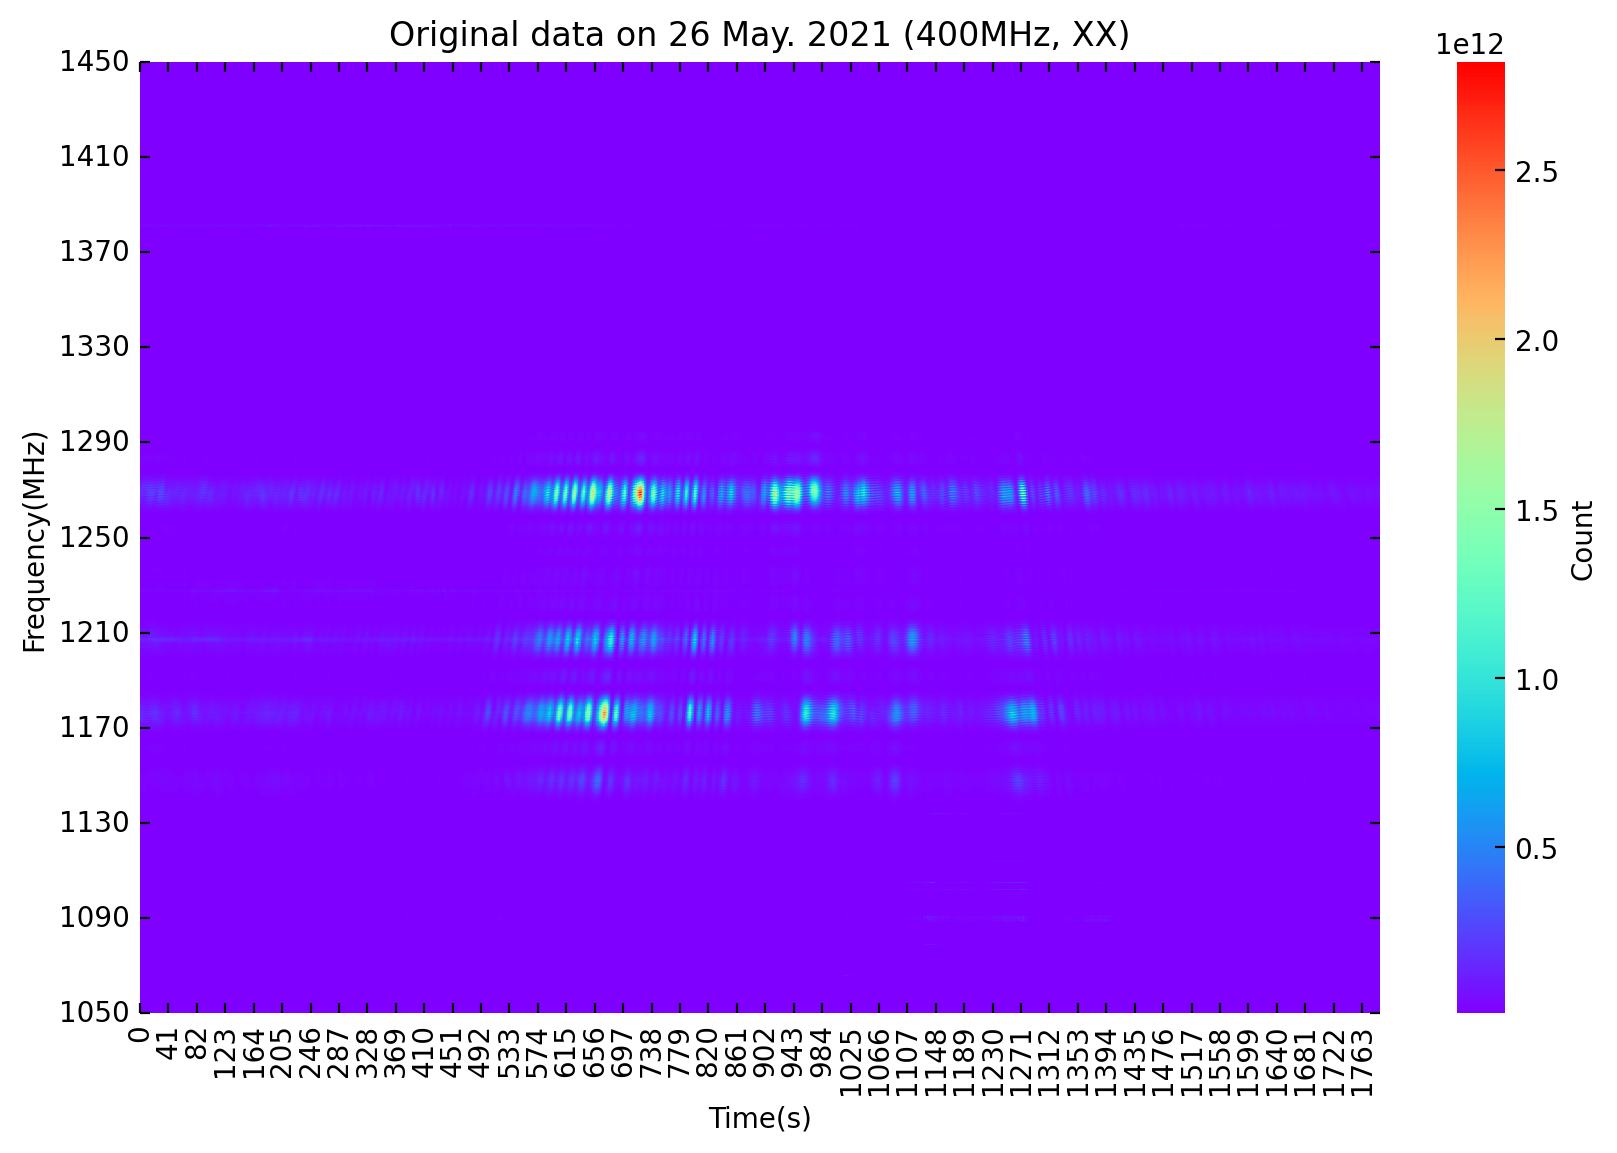

In [7]:
plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
#cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
cmap = 'rainbow'
# 创建掩码数组
# mask = np.zeros_like(timespec2D_I_F)  # 创建与数据数组相同形状的全零数组
# mask[1500:3000,:] = 1  # 将需要屏蔽的部分设置为 1
# mask[1000:1300,:] = 1  # 将需要屏蔽的部分设置为 1
#sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(data = (XX0526),cmap = cmap,cbar_kws={'label': 'Count'})
#x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator(4000/10)
ax=plt.gca()
ax.invert_yaxis()
ax.set_facecolor("black")
#ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
# ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
ax.set_yticklabels([i for i in range(1050-int((400)/10),1450+int((400)/10),int((400)/10))])
#plt.xlabel('time(*10s)')
#plt.ylabel('frequency(*2MHz+1050MHz)')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(MHz)')
plt.title('Original data on 26 May. 2021 (400MHz, XX)')
#plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
#plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
#         png_pth = './png/rm_sd/'
#         if not os.path.exists(pth):
#             os.makedirs(pth)
#         plt.savefig(png_pth+'Antena_Temperature:'+name[11:13]+'.png') # 记得改
#         plt.close()
plt.show()

/tmp/ipykernel_67662/3914415888.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


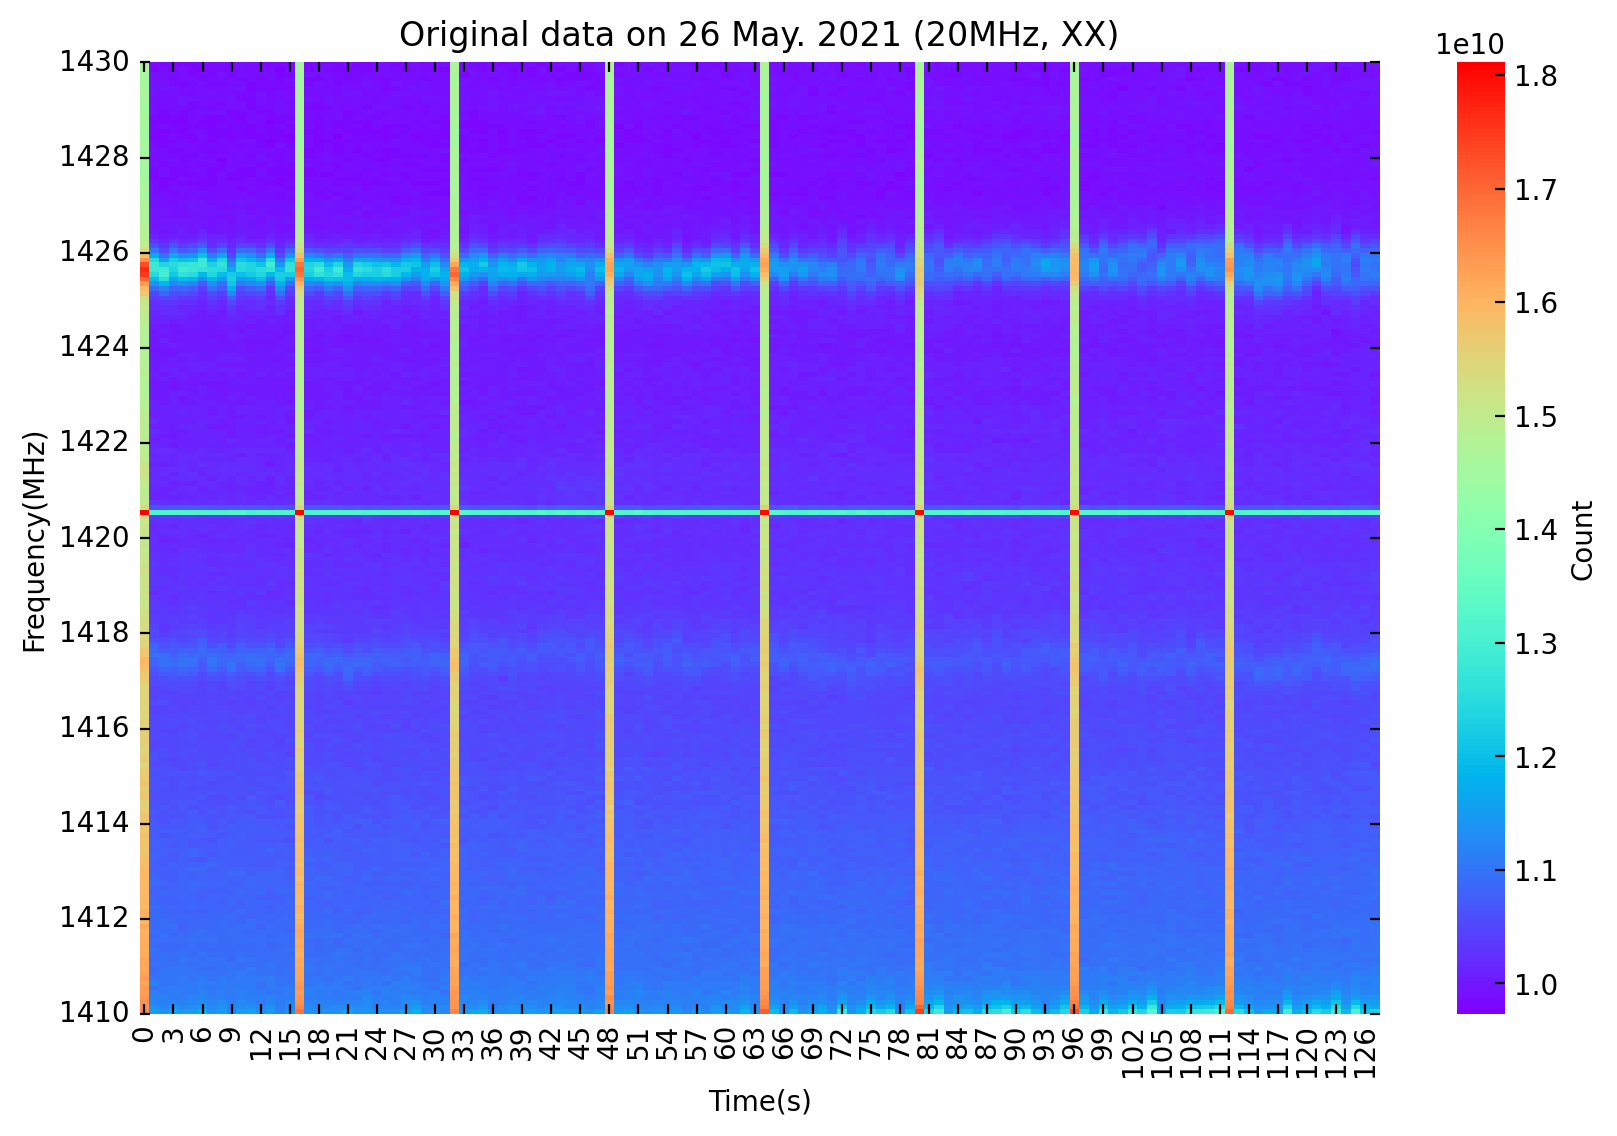

In [19]:
start_frq = 1410

end_frq = 1430

start = int((start_frq-1050)/400*XX0526.shape[0])
end = int((end_frq-1050)/400*XX0526.shape[0])

plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
#cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
cmap = 'rainbow'
# 创建掩码数组
# mask = np.zeros_like(timespec2D_I_F)  # 创建与数据数组相同形状的全零数组
# mask[1500:3000,:] = 1  # 将需要屏蔽的部分设置为 1
# mask[1000:1300,:] = 1  # 将需要屏蔽的部分设置为 1
#sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(data = (XX0526[start:end,:128]),cmap = cmap,cbar_kws={'label': 'Count'})
#x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator((end-start)/10)
ax=plt.gca()
ax.invert_yaxis()
ax.set_facecolor("black")
#ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
# ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])
#plt.xlabel('time(*10s)')
#plt.ylabel('frequency(*2MHz+1050MHz)')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(MHz)')
plt.title('Original data on 26 May. 2021 (20MHz, XX)')
#plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
#plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
#         png_pth = './png/rm_sd/'
#         if not os.path.exists(pth):
#             os.makedirs(pth)
#         plt.savefig(png_pth+'Antena_Temperature:'+name[11:13]+'.png') # 记得改
#         plt.close()
plt.show()

(4000, 1789)


/home/antony/anaconda3/lib/python3.10/site-packages/fastdatapy/fastoperations.py:751: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


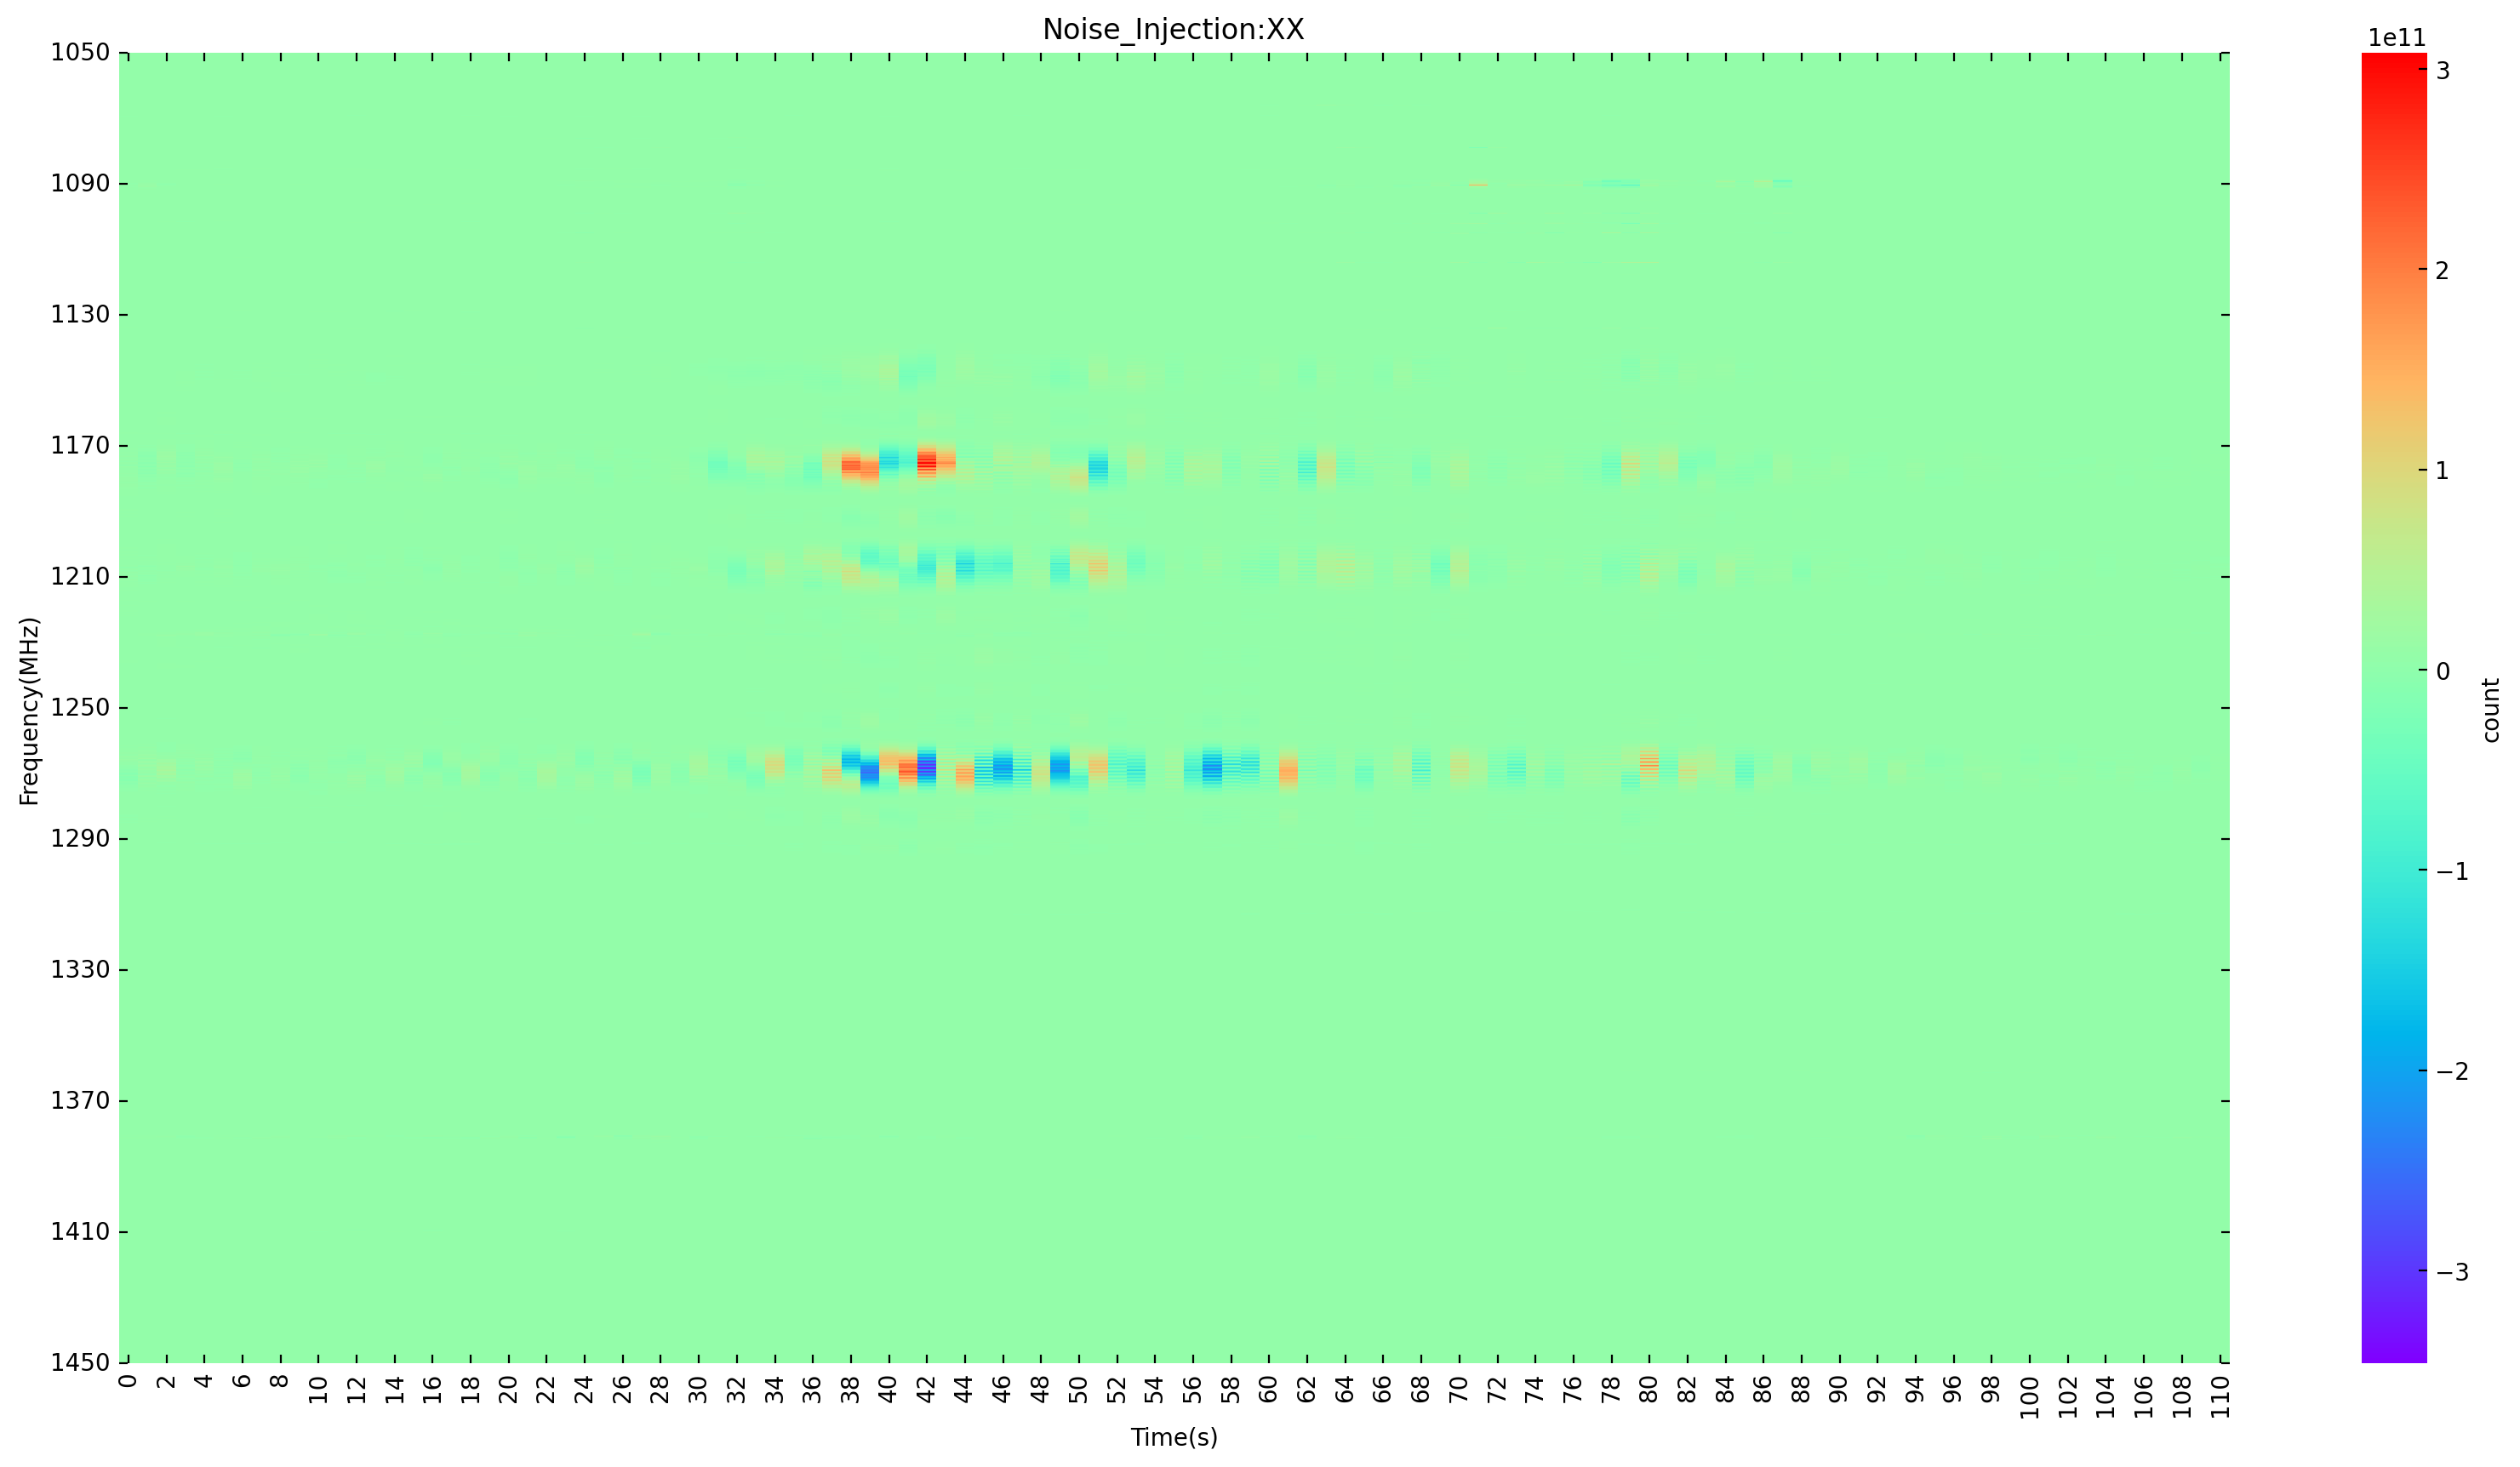

/home/antony/anaconda3/lib/python3.10/site-packages/fastdatapy/fastoperations.py:863: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


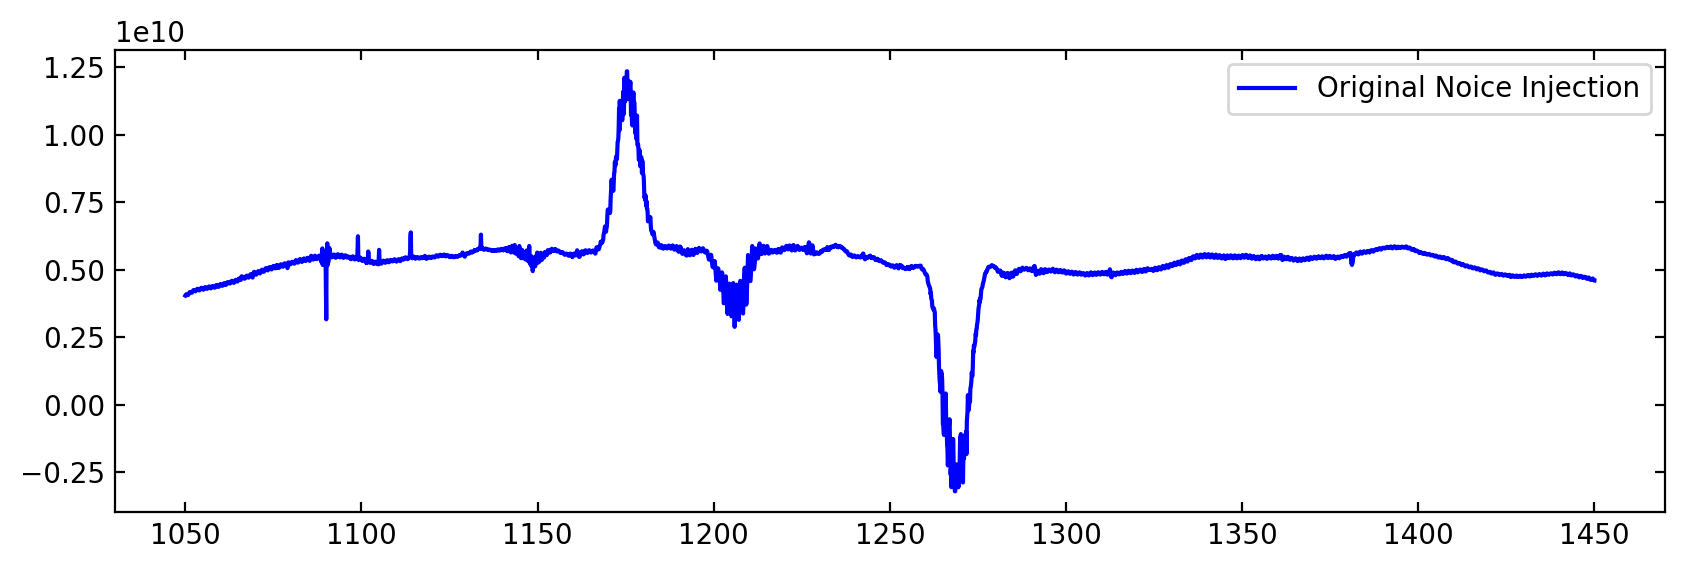

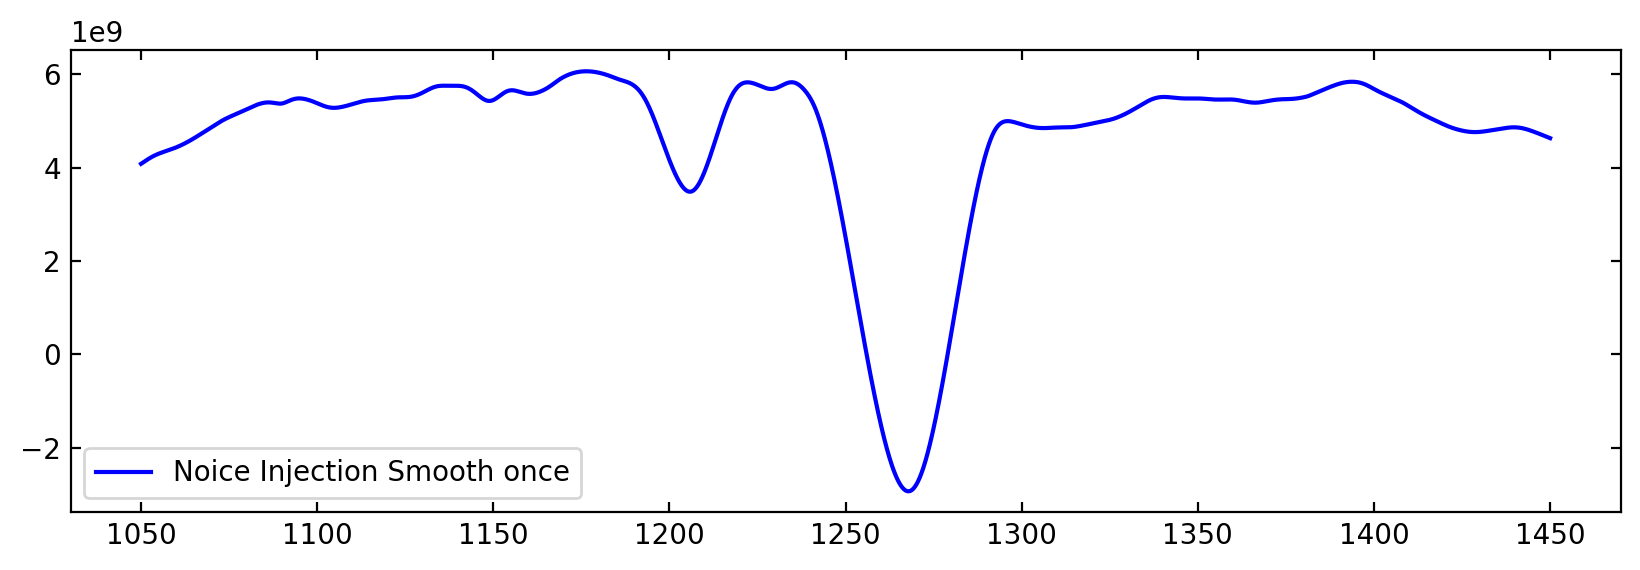

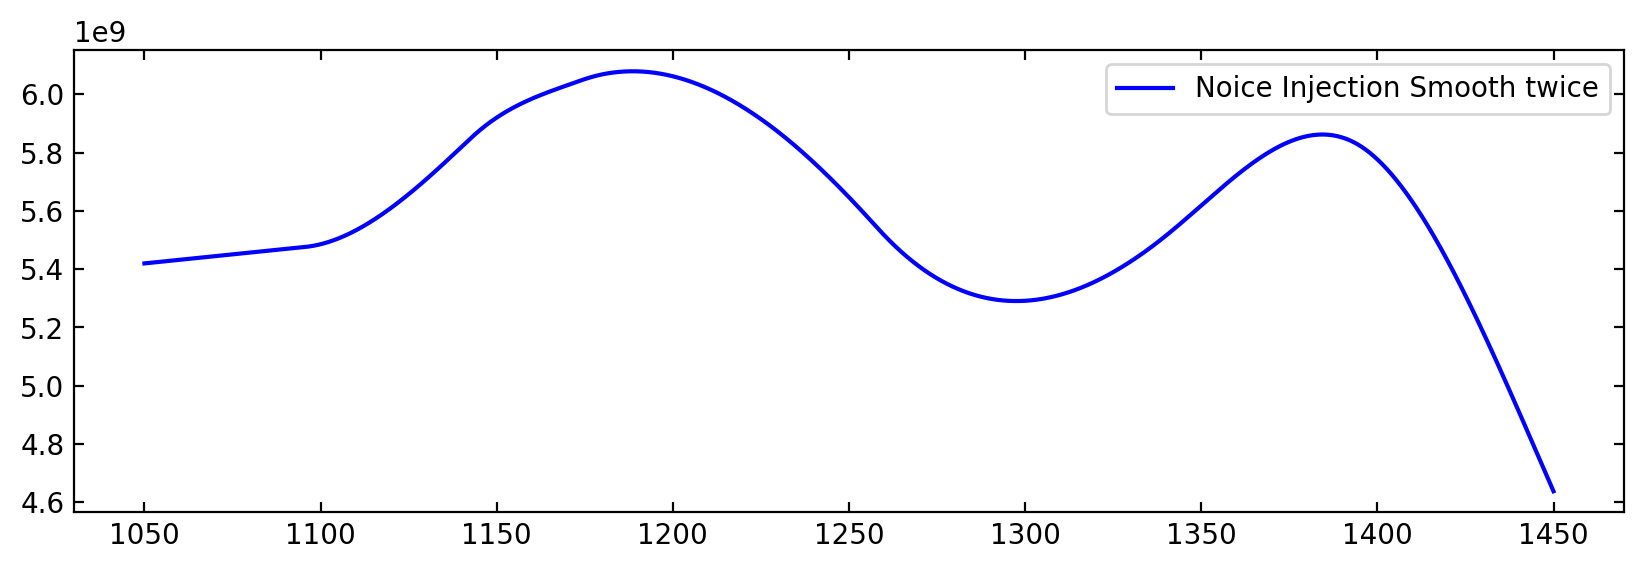

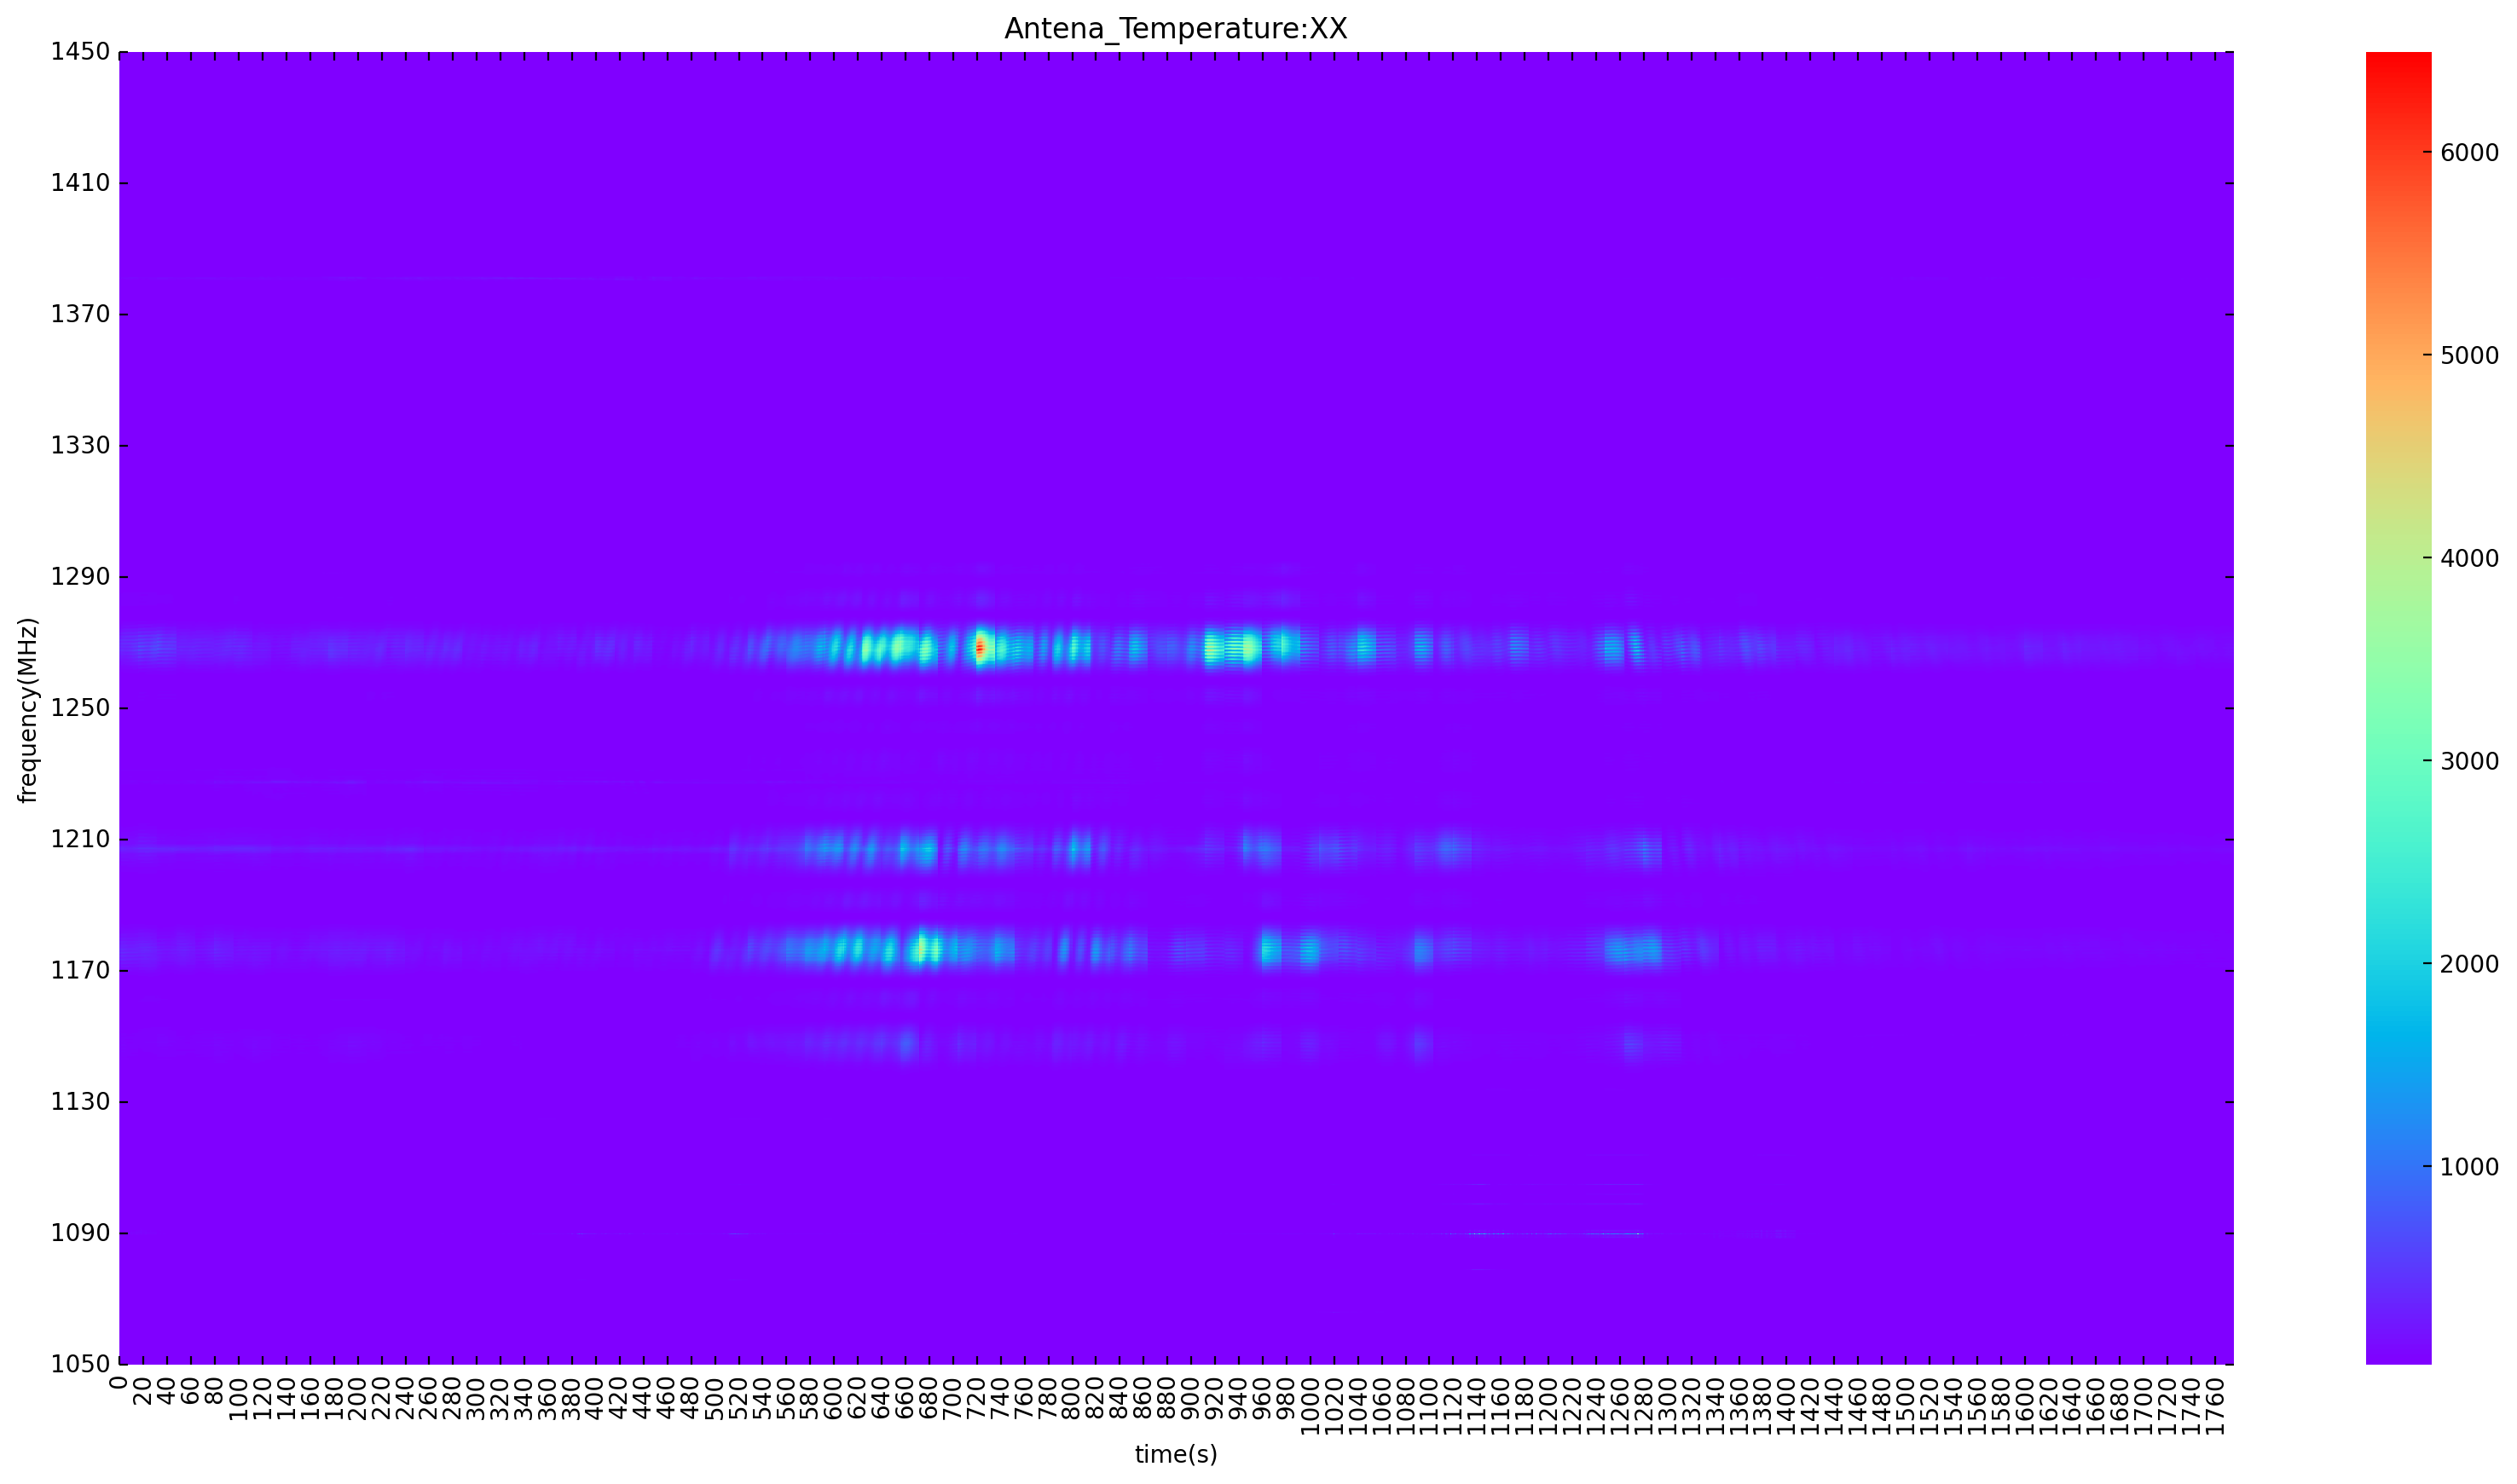

In [5]:
timespec2D = XX0526

bandwidth = 400

start_frq = 1050

end_frq = 1450

save_pth = 'npy/20210526/01/test/Ta/'

polarization = 'XX'

F.calibrate_count2Ta(timespec2D,bandwidth,start_frq,end_frq,save_pth,polarization)

In [6]:
YY0526 = np.load('./npy/20210526/01/timespec2D_YY_M01_total.npy')

(4000, 1789)


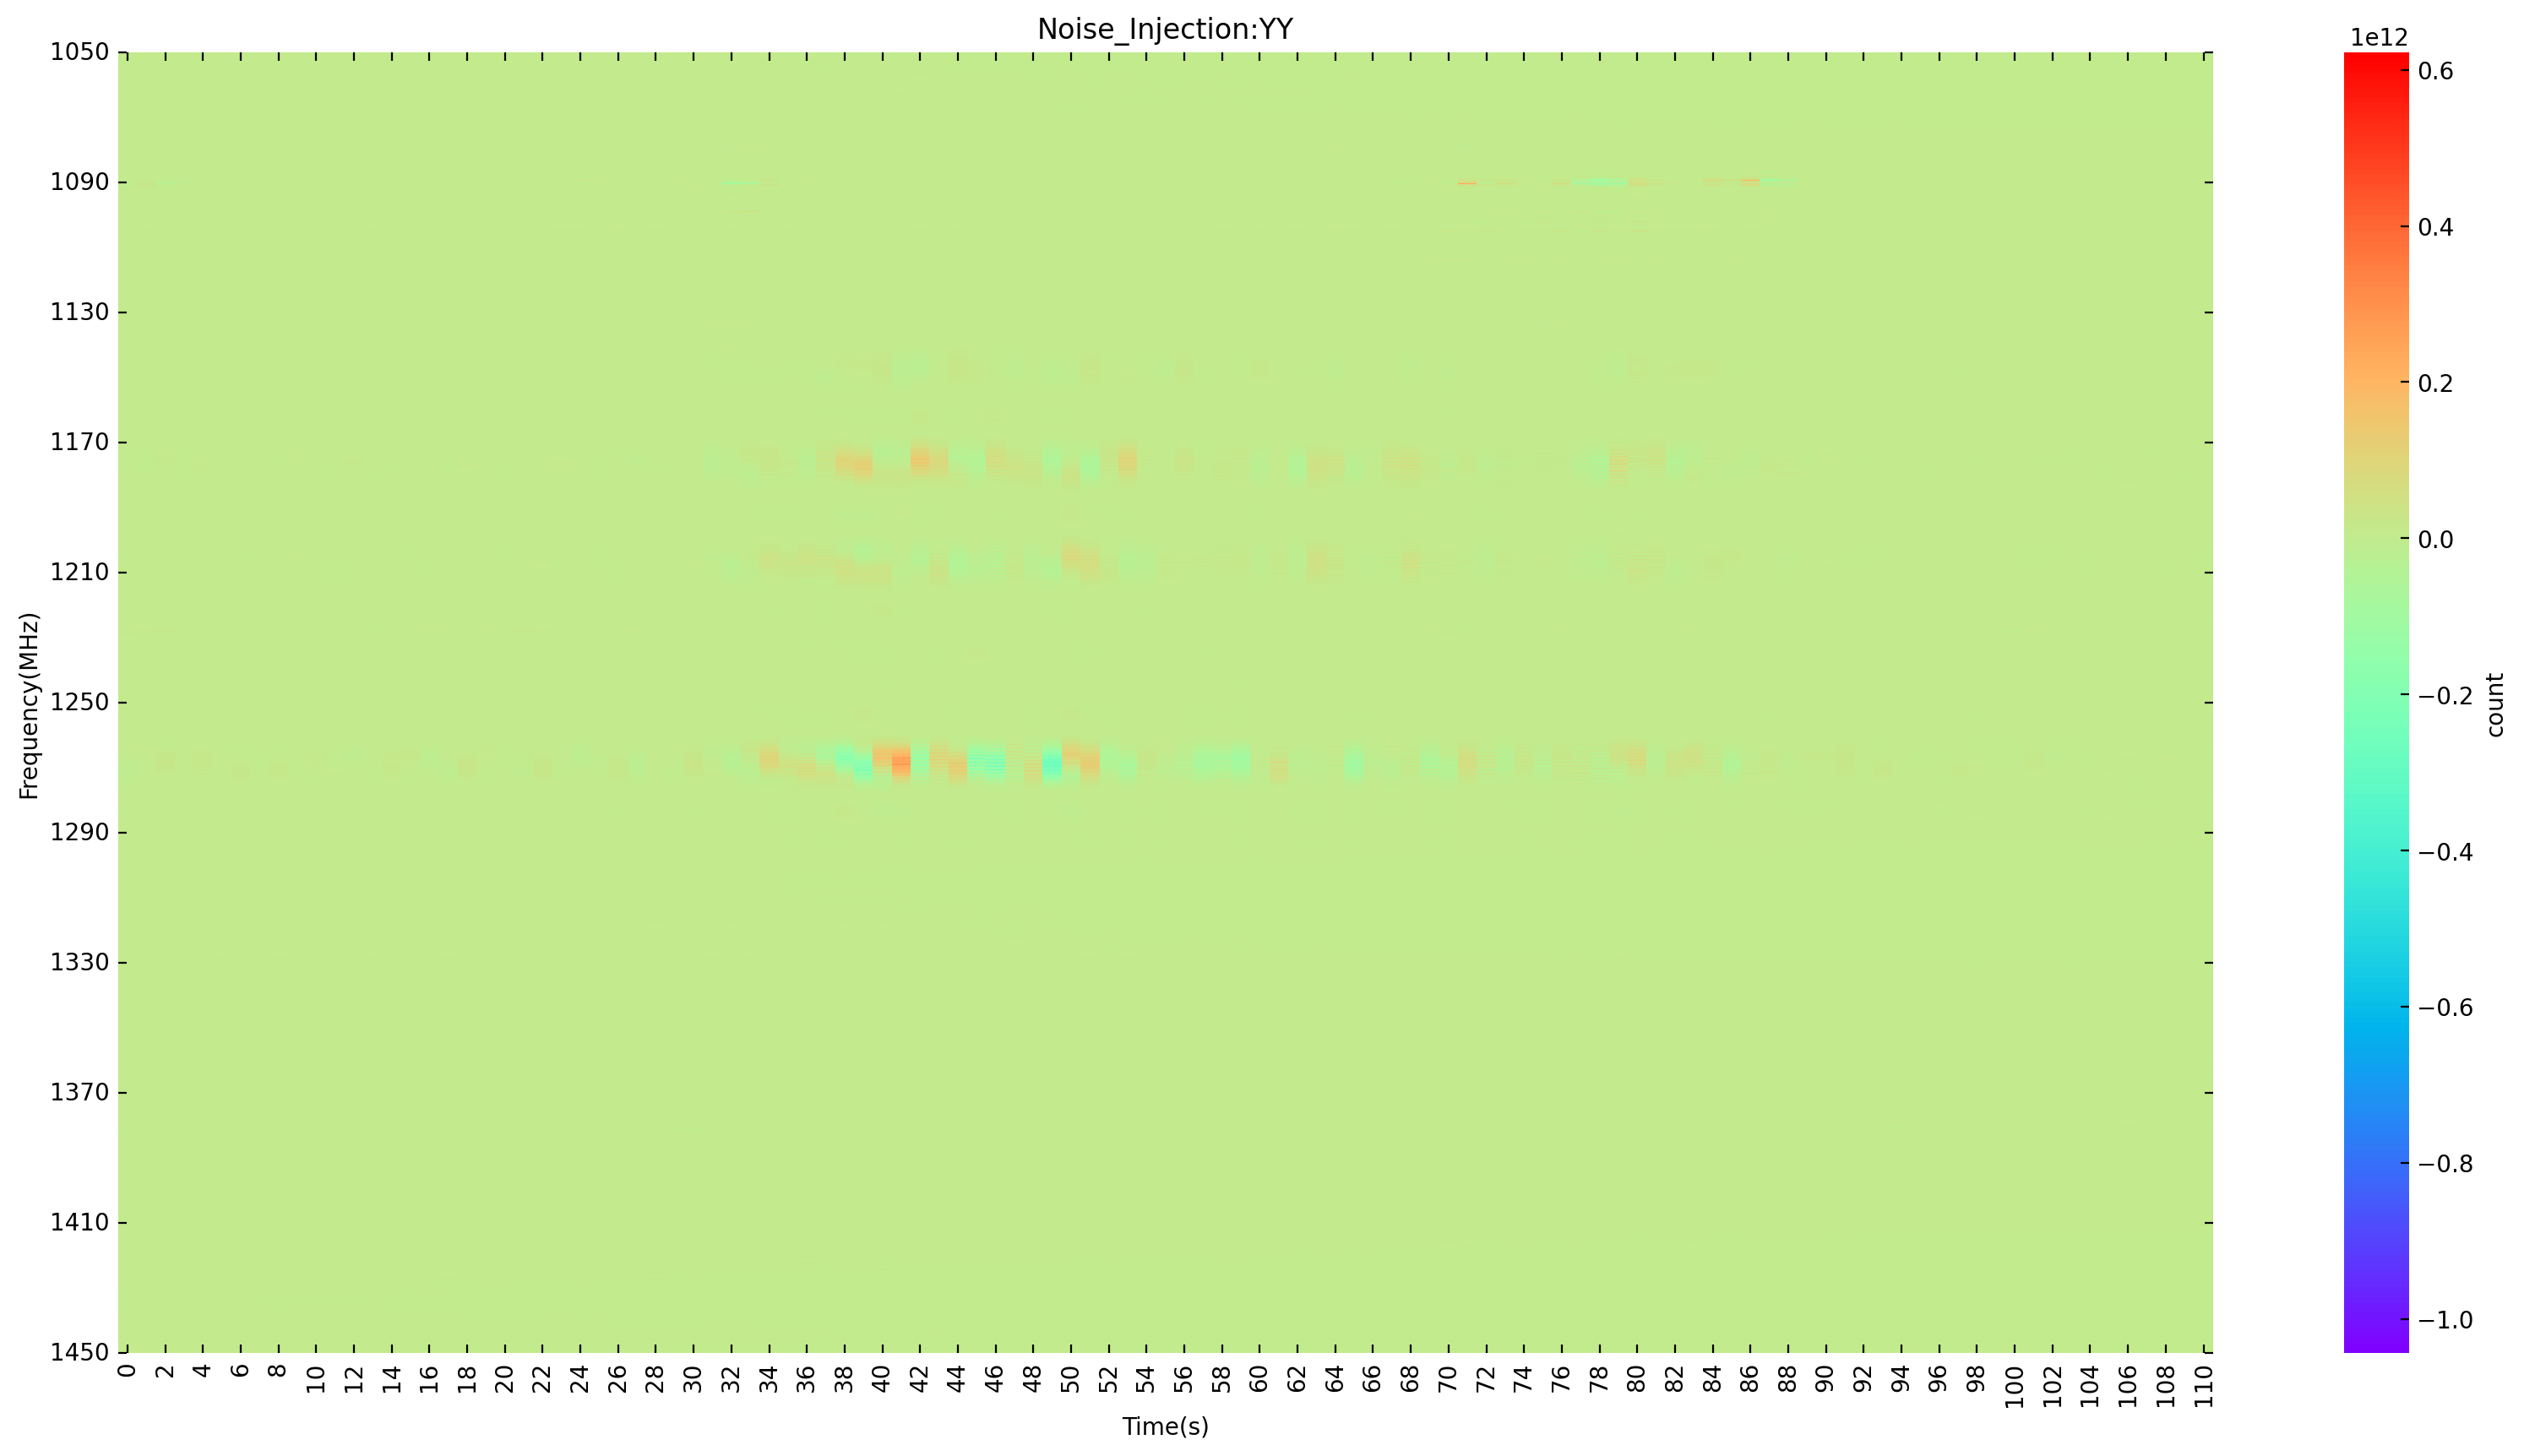

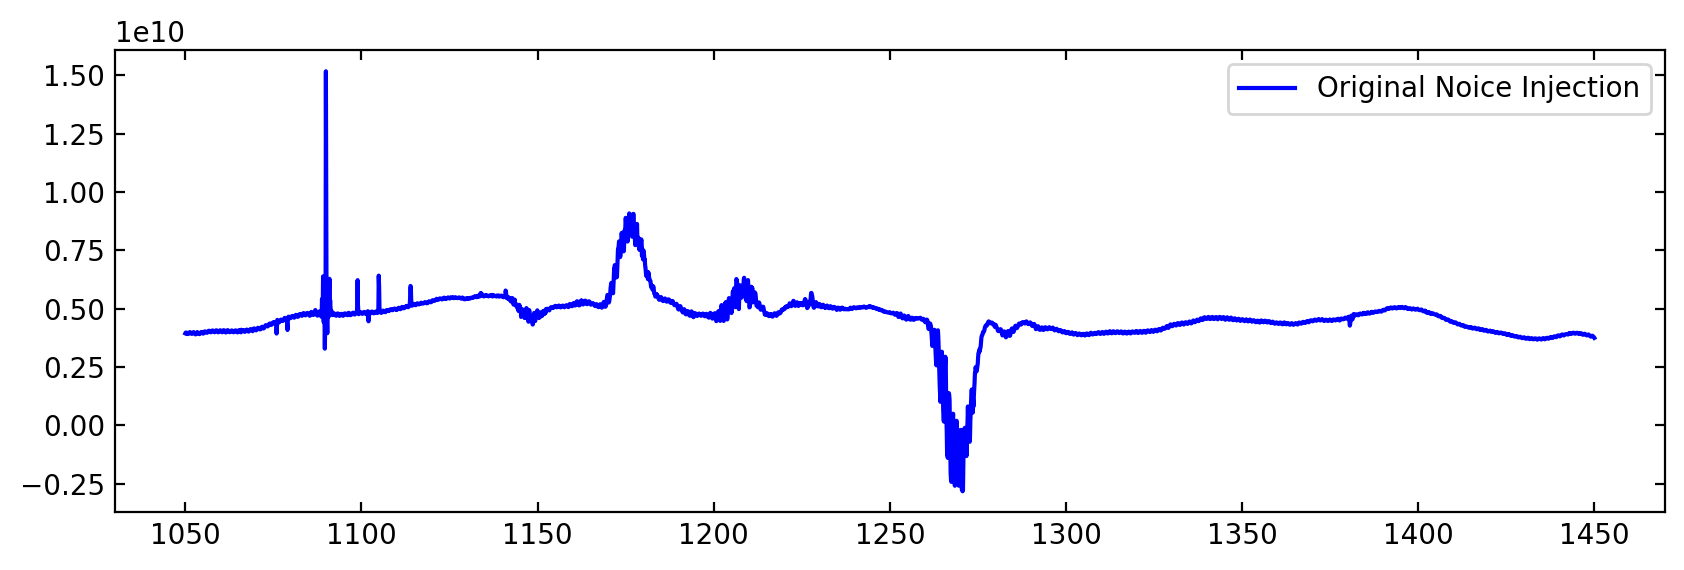

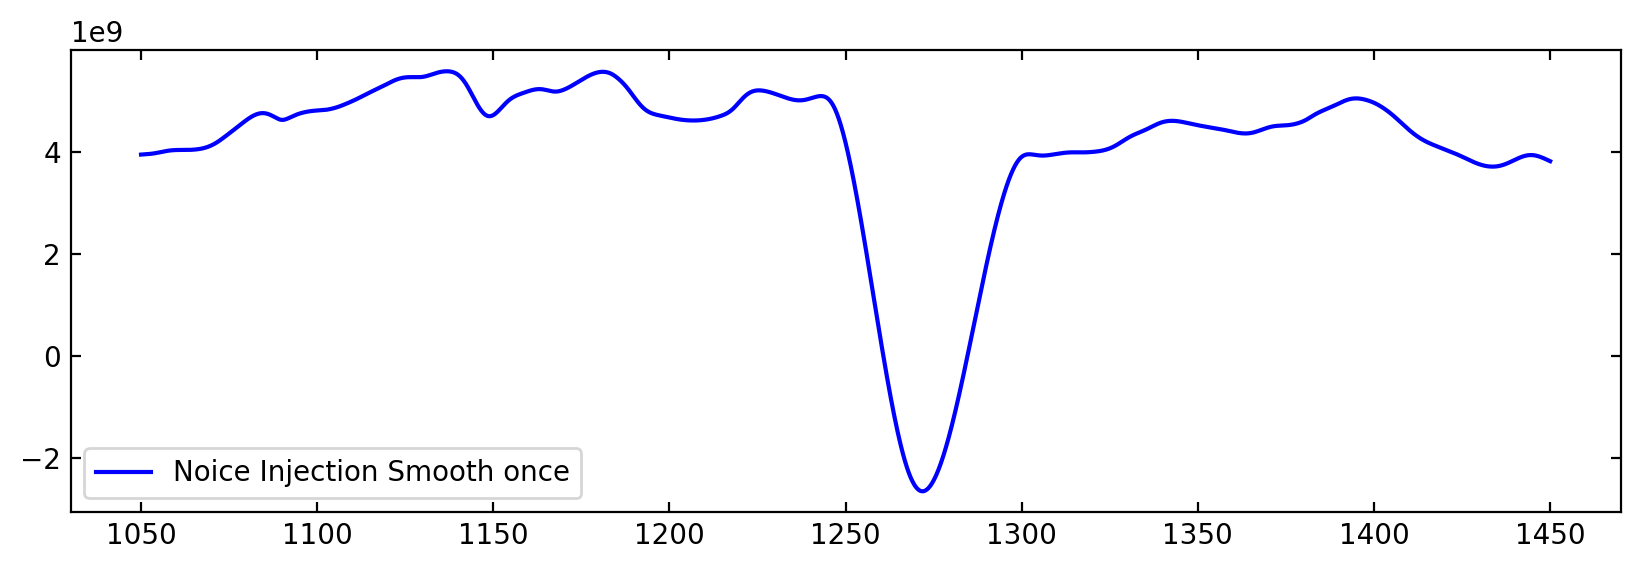

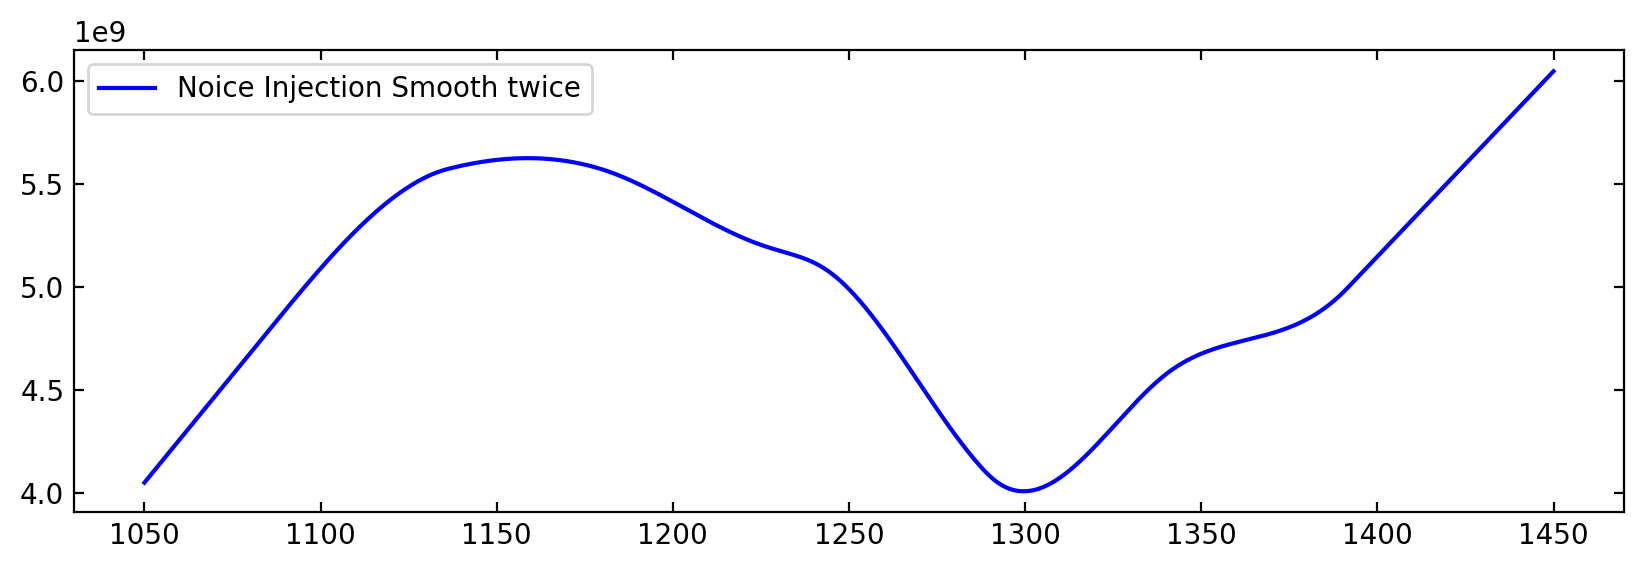

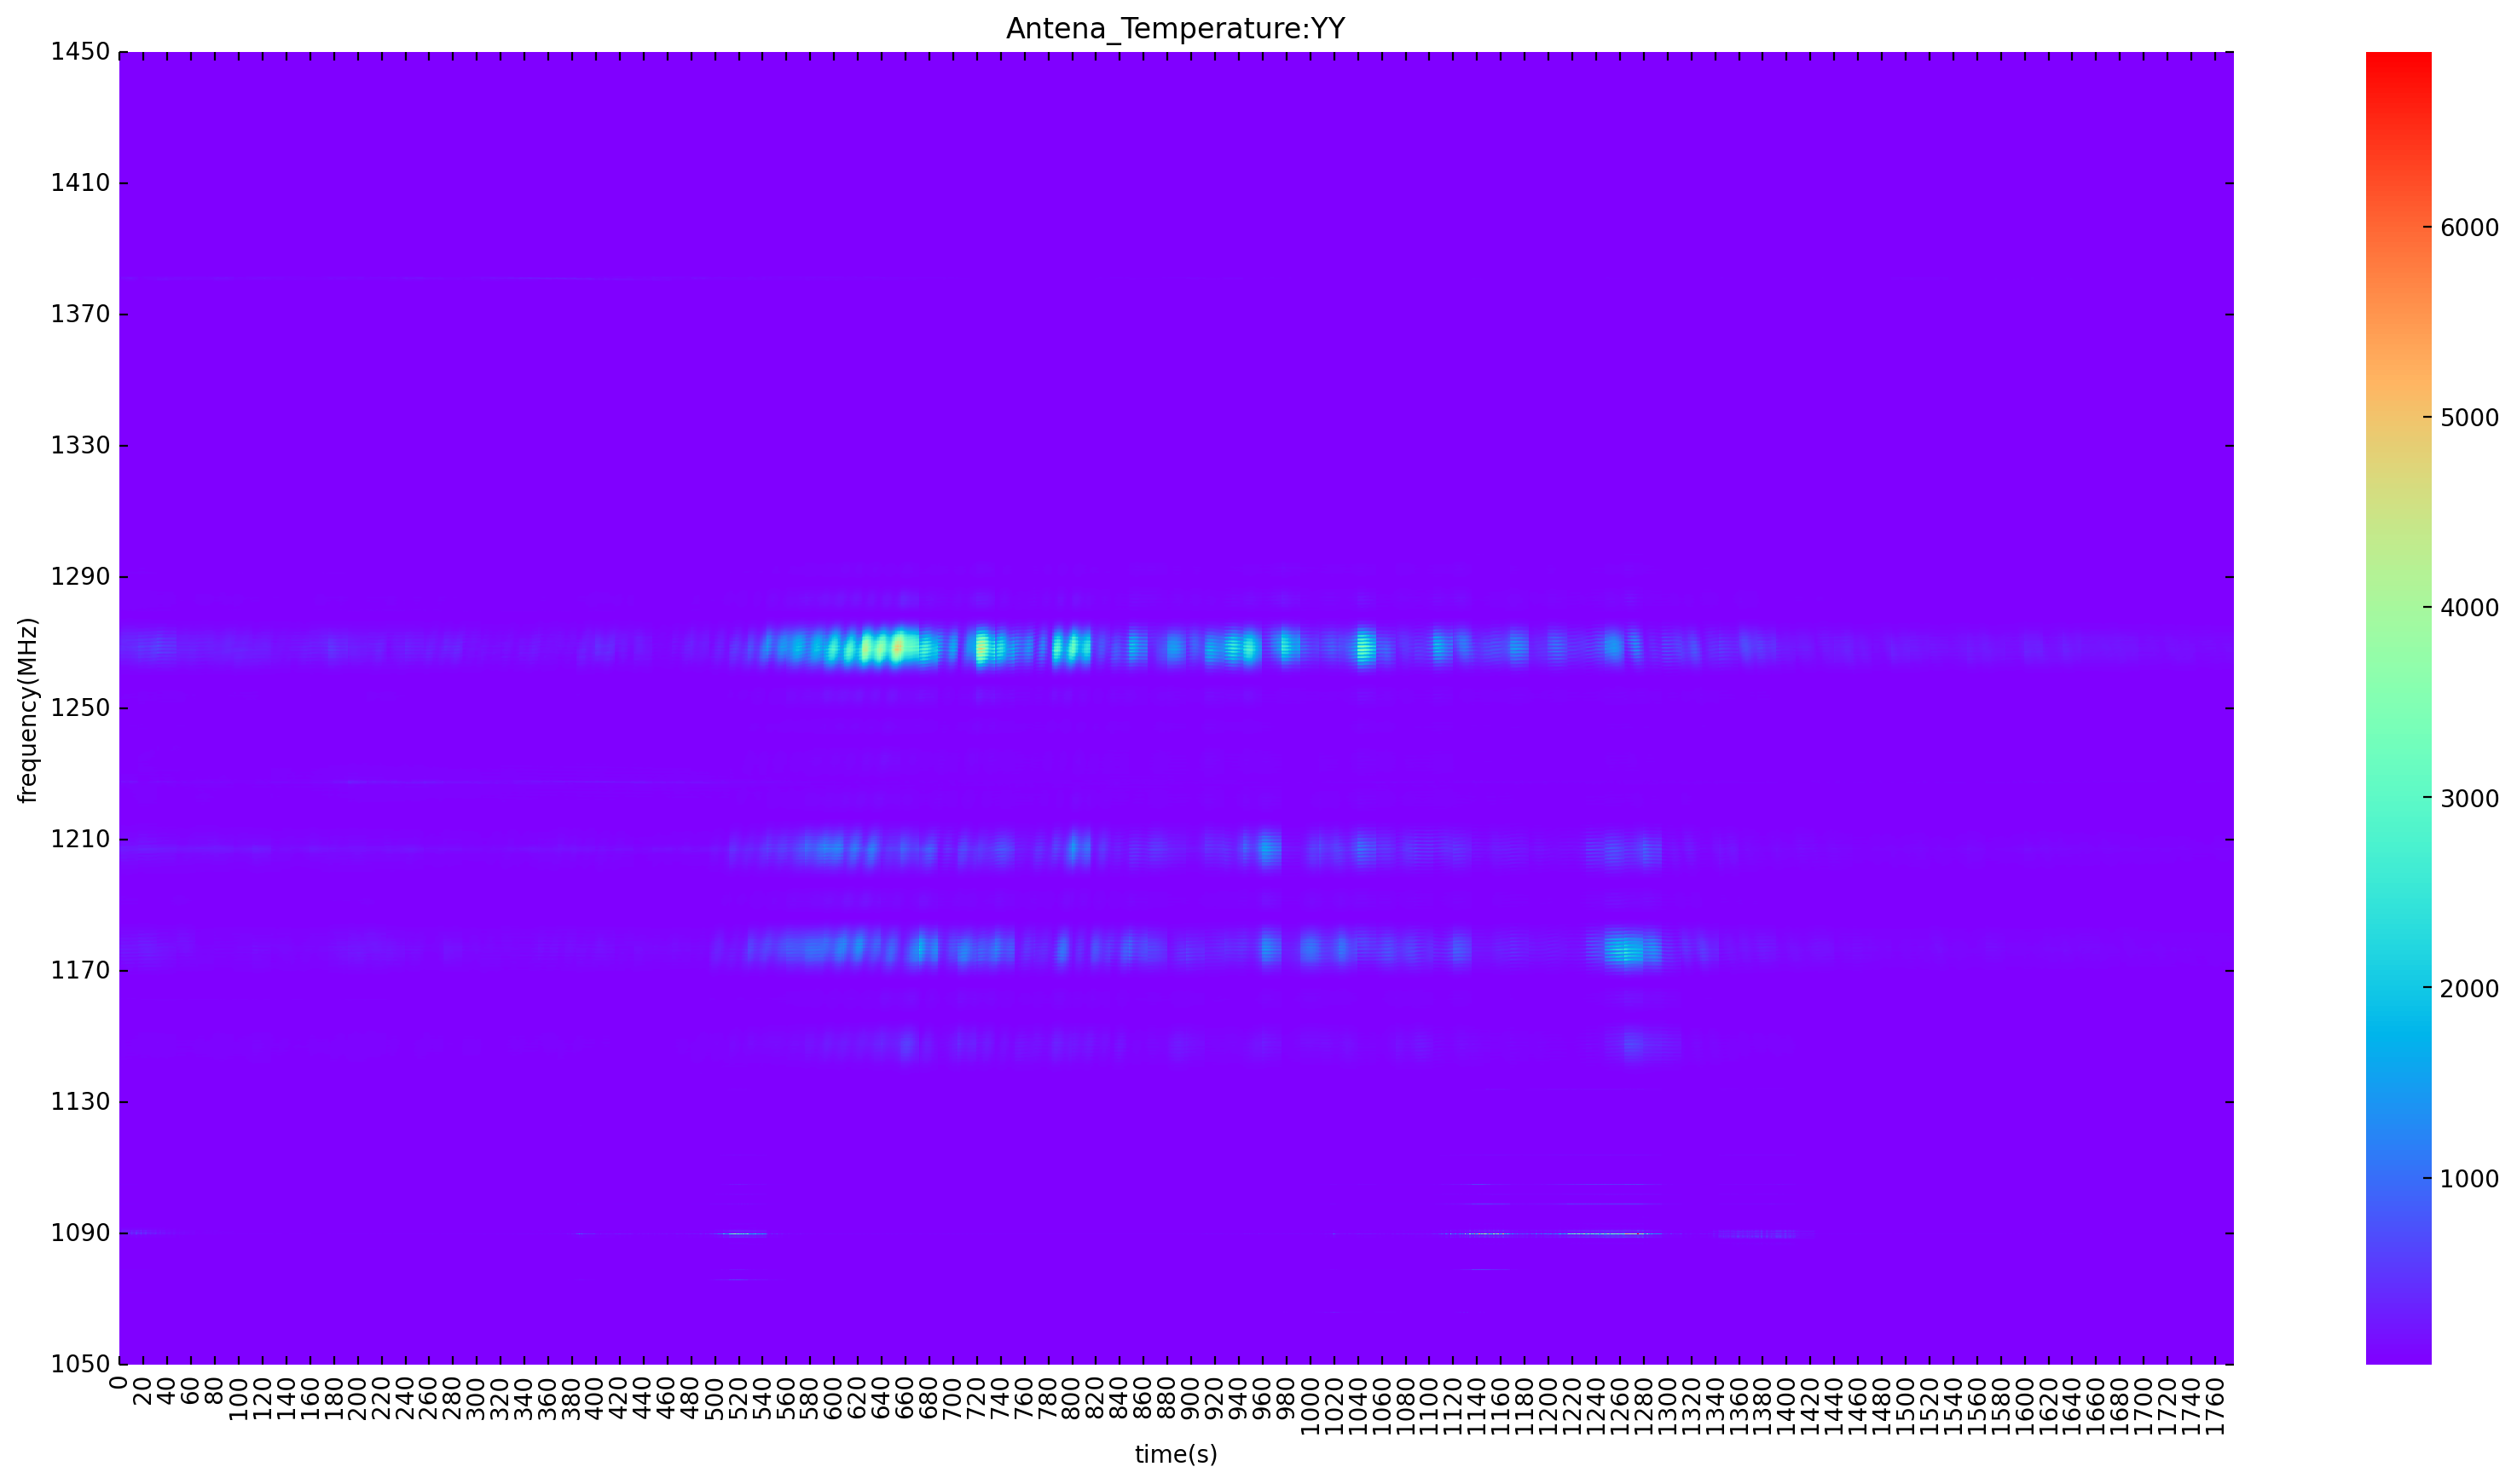

In [7]:
timespec2D = YY0526

bandwidth = 400

start_frq = 1050

end_frq = 1450

save_pth = 'npy/20210526/01/test/Ta/'

polarization = 'YY'

F.calibrate_count2Ta(timespec2D,bandwidth,start_frq,end_frq,save_pth,polarization)

In [8]:
Ta0526 = (np.load('npy/20210526/01/test/Ta/XX_Ta_1050-1450.npy')+np.load('npy/20210526/01/test/Ta/YY_Ta_1050-1450.npy'))/2

/tmp/ipykernel_91456/541359088.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


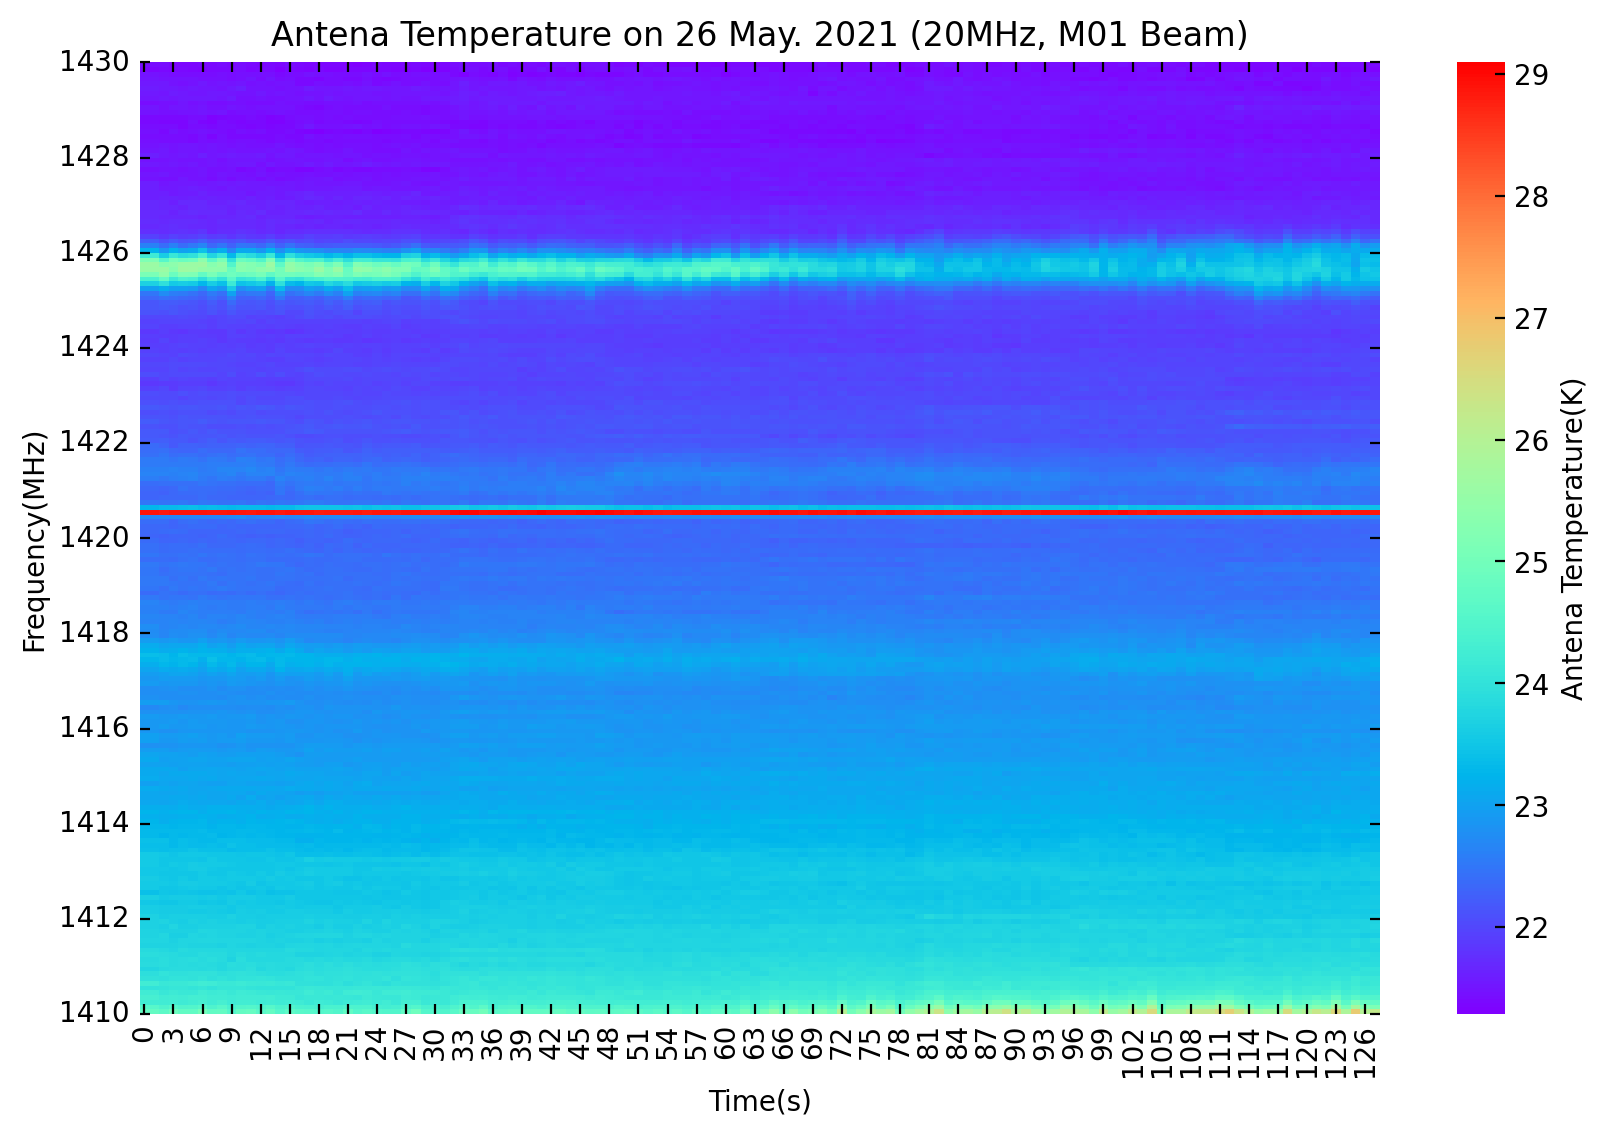

In [10]:
start_frq = 1410

end_frq = 1430

start = int((start_frq-1050)/400*Ta0526.shape[0])
end = int((end_frq-1050)/400*Ta0526.shape[0])

plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
#cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
cmap = 'rainbow'
# 创建掩码数组
# mask = np.zeros_like(timespec2D_I_F)  # 创建与数据数组相同形状的全零数组
# mask[1500:3000,:] = 1  # 将需要屏蔽的部分设置为 1
# mask[1000:1300,:] = 1  # 将需要屏蔽的部分设置为 1
#sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(data = (Ta0526[start:end,:128]),cmap = cmap,cbar_kws={'label': 'Antena Temperature(K)'})
#x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator((end-start)/10)
ax=plt.gca()
ax.invert_yaxis()
ax.set_facecolor("black")
#ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
# ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])
#plt.xlabel('time(*10s)')
#plt.ylabel('frequency(*2MHz+1050MHz)')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(MHz)')
plt.title('Antena Temperature on 26 May. 2021 (20MHz, M01 Beam)')
#plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
#plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
#         png_pth = './png/rm_sd/'
#         if not os.path.exists(pth):
#             os.makedirs(pth)
#         plt.savefig(png_pth+'Antena_Temperature:'+name[11:13]+'.png') # 记得改
#         plt.close()
plt.show()

/tmp/ipykernel_91456/2882545965.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


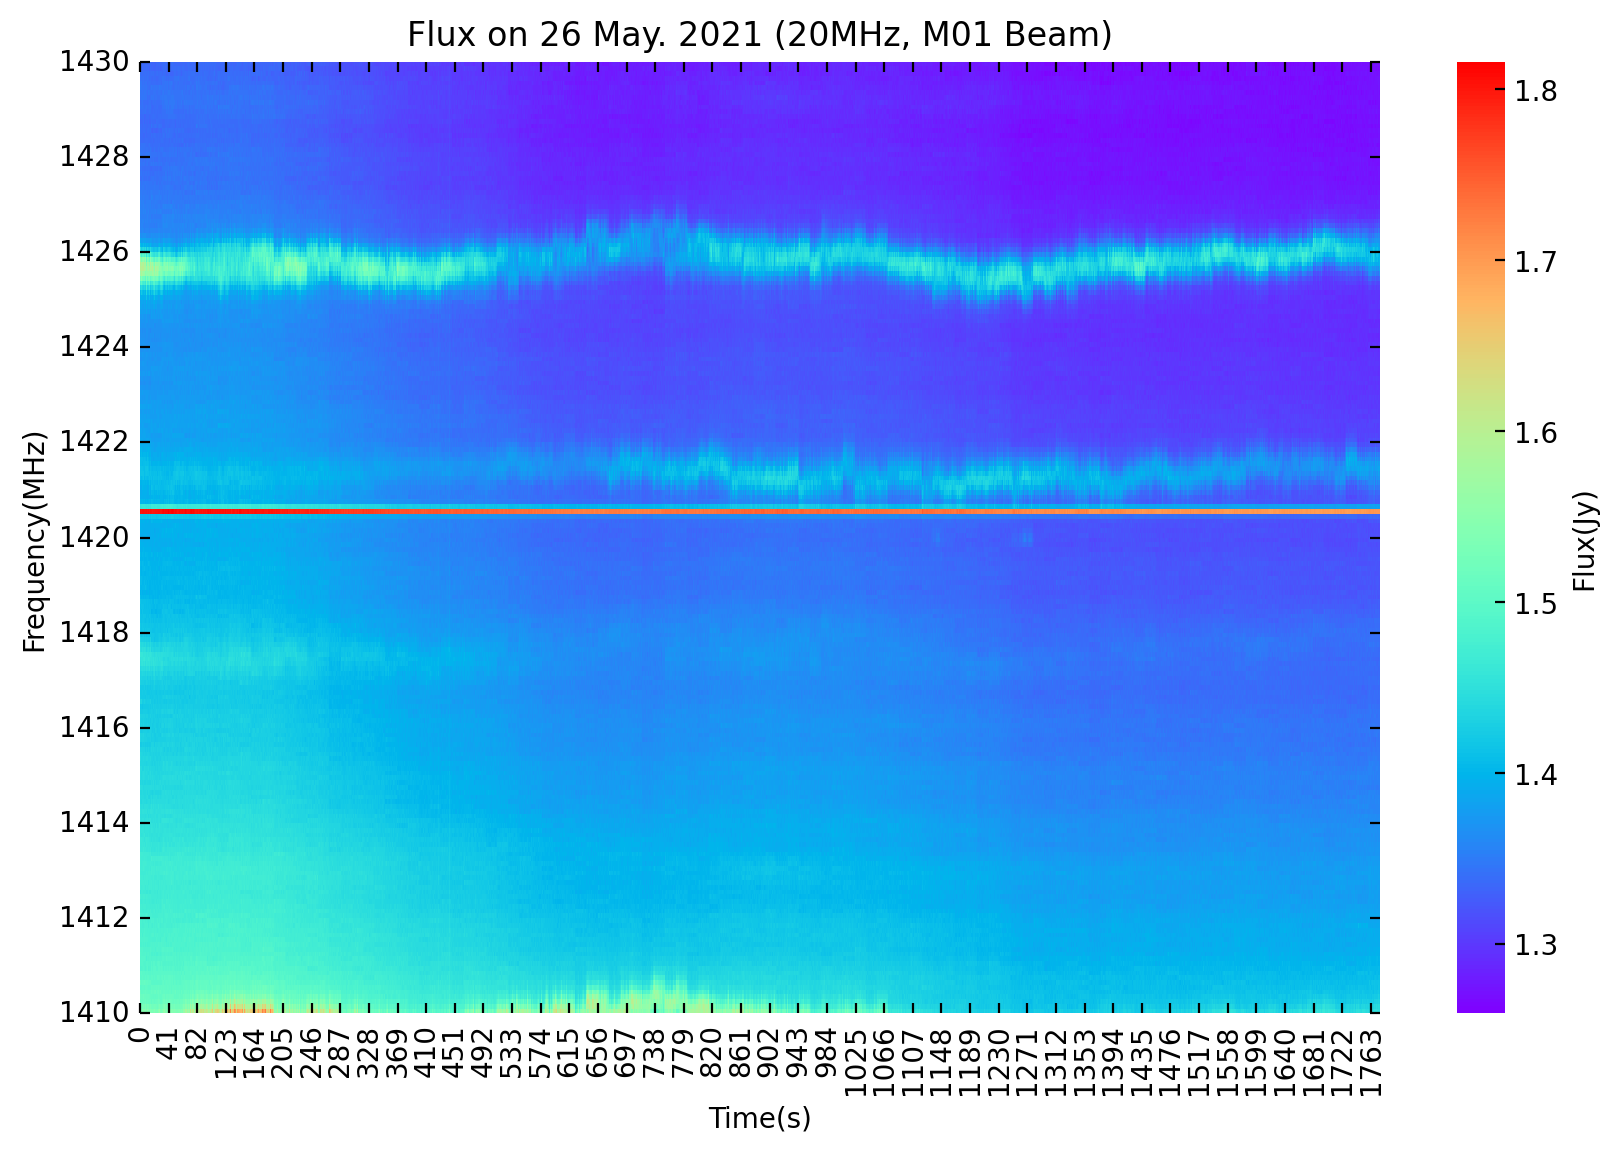

In [18]:
I0526 = Ta0526/16.02 #gain G = 16.02 for single polarization

start_frq = 1410

end_frq = 1430


plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
#cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
cmap = 'rainbow'
# 创建掩码数组
# mask = np.zeros_like(timespec2D_I_F)  # 创建与数据数组相同形状的全零数组
# mask[1500:3000,:] = 1  # 将需要屏蔽的部分设置为 1
# mask[1000:1300,:] = 1  # 将需要屏蔽的部分设置为 1
#sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(data = (I0526[start:end,:]),cmap = cmap,cbar_kws={'label': 'Flux(Jy)'})
#x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator((200)/10)
ax=plt.gca()
ax.invert_yaxis()
ax.set_facecolor("black")
#ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
# ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])
#plt.xlabel('time(*10s)')
#plt.ylabel('frequency(*2MHz+1050MHz)')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(MHz)')
plt.title('Flux on 26 May. 2021 (20MHz, M01 Beam)')
#plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
#plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
#         png_pth = './png/rm_sd/'
#         if not os.path.exists(pth):
#             os.makedirs(pth)
#         plt.savefig(png_pth+'Antena_Temperature:'+name[11:13]+'.png') # 记得改
#         plt.close()
plt.show()

/tmp/ipykernel_91456/3330370885.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


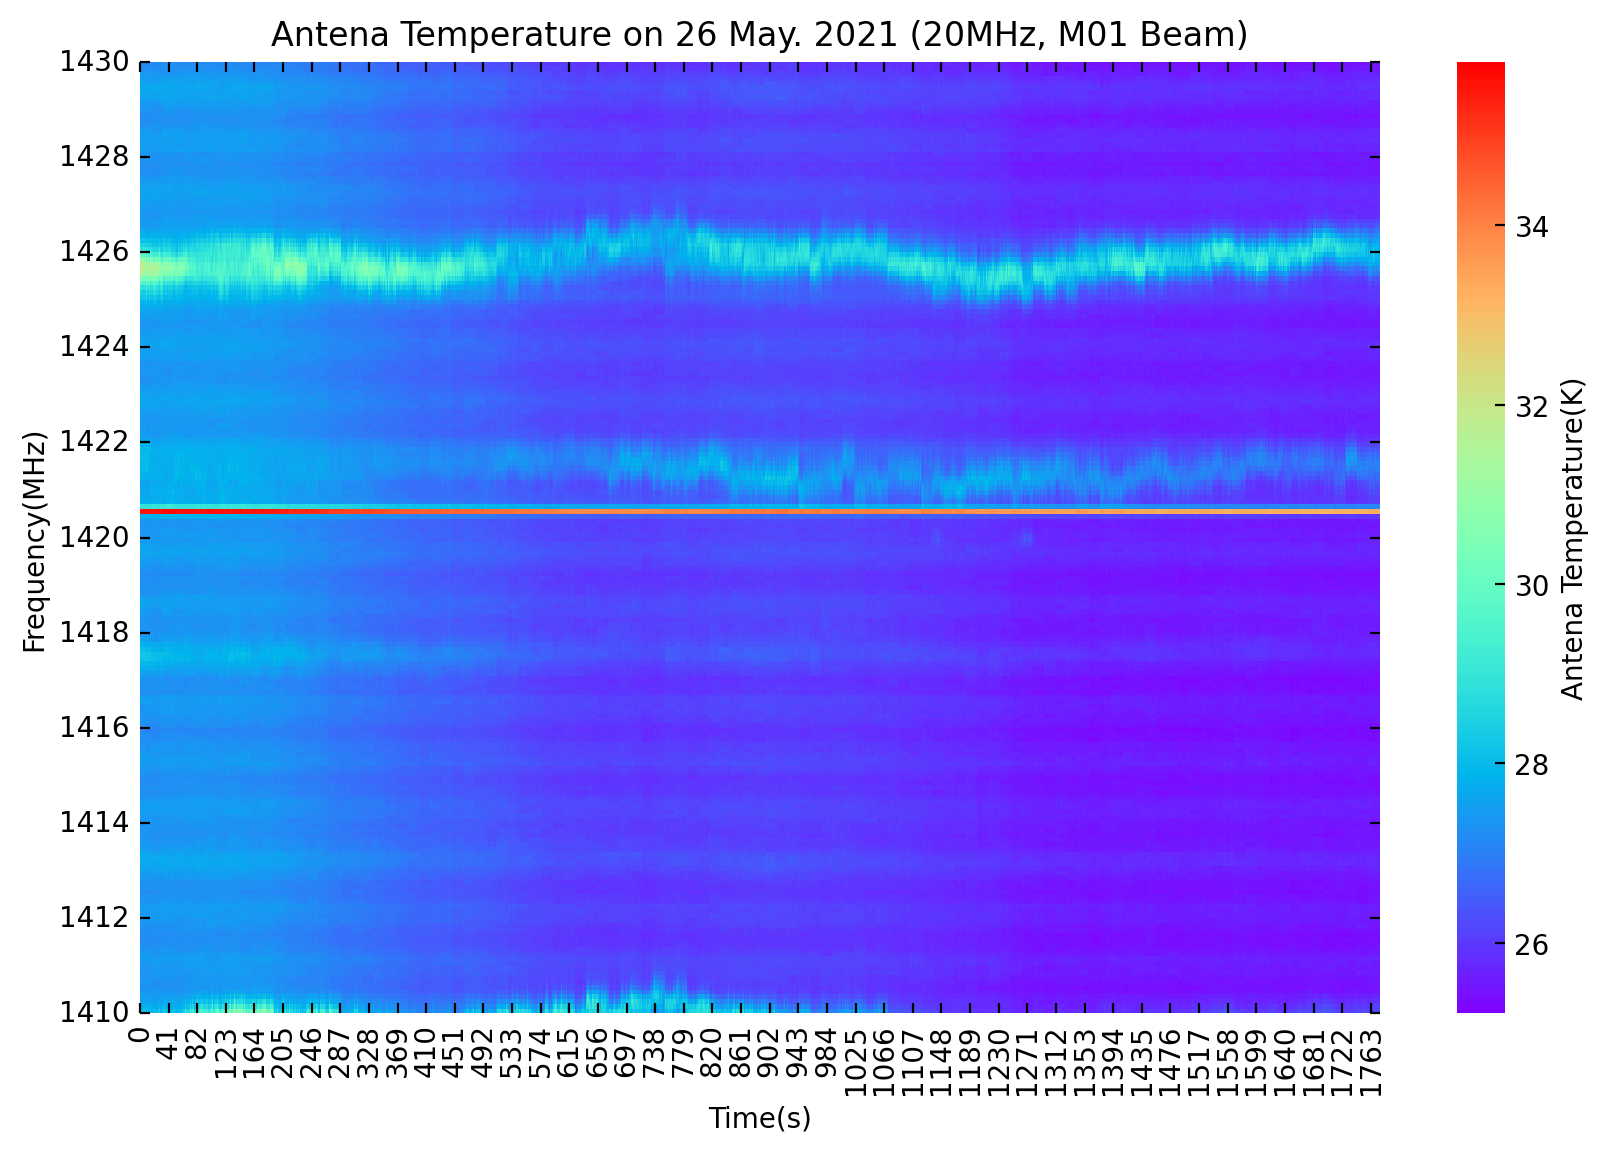

In [11]:
# not smooth noise injection

Ta0526_former = (np.load('npy/20210526/01/Ta/XX_Ta_1410-1430.npy')+np.load('npy/20210526/01/Ta/YY_Ta_1410-1430.npy'))/2

start_frq = 1410

end_frq = 1430

# start = int((start_frq-1050)/400*Ta0526_former.shape[0])
# end = int((end_frq-1050)/400*Ta0526_former.shape[0])

plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
#cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
cmap = 'rainbow'
# 创建掩码数组
# mask = np.zeros_like(timespec2D_I_F)  # 创建与数据数组相同形状的全零数组
# mask[1500:3000,:] = 1  # 将需要屏蔽的部分设置为 1
# mask[1000:1300,:] = 1  # 将需要屏蔽的部分设置为 1
#sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(data = (Ta0526_former),cmap = cmap,cbar_kws={'label': 'Antena Temperature(K)'})
#x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator((200)/10)
ax=plt.gca()
ax.invert_yaxis()
ax.set_facecolor("black")
#ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
# ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])
#plt.xlabel('time(*10s)')
#plt.ylabel('frequency(*2MHz+1050MHz)')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(MHz)')
plt.title('Antena Temperature on 26 May. 2021 (20MHz, M01 Beam)')
#plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
#plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
#         png_pth = './png/rm_sd/'
#         if not os.path.exists(pth):
#             os.makedirs(pth)
#         plt.savefig(png_pth+'Antena_Temperature:'+name[11:13]+'.png') # 记得改
#         plt.close()
plt.show()

/tmp/ipykernel_91456/2707797847.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


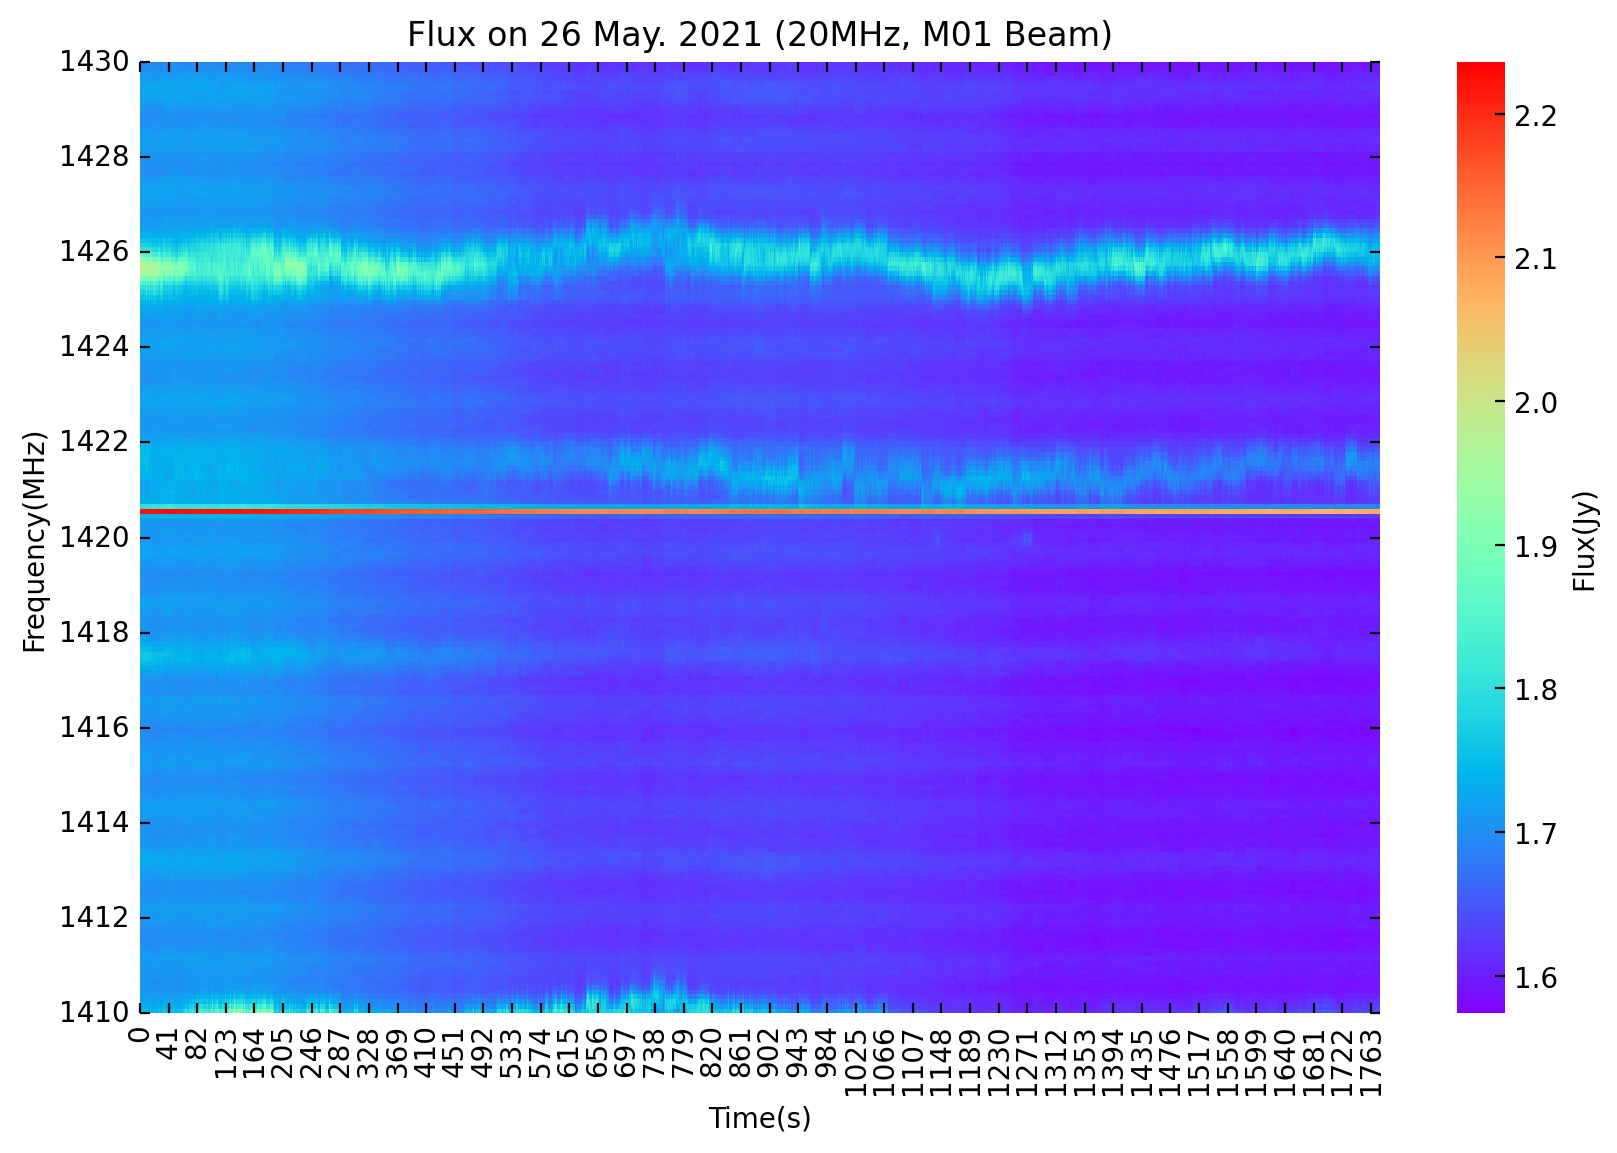

In [32]:
#Antena Temperature to Flux

I_former = np.load('npy/20210526/01/Ta/I_F.npy')

start_frq = 1410

end_frq = 1430

# start = int((start_frq-1050)/400*I__former.shape[0])
# end = int((end_frq-1050)/400*I__former.shape[0])

plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
#cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
cmap = 'rainbow'
# 创建掩码数组
# mask = np.zeros_like(timespec2D_I_F)  # 创建与数据数组相同形状的全零数组
# mask[1500:3000,:] = 1  # 将需要屏蔽的部分设置为 1
# mask[1000:1300,:] = 1  # 将需要屏蔽的部分设置为 1
#sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(data = (I_former),cmap = cmap,cbar_kws={'label': 'Flux(Jy)'})
#x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator((200)/10)
ax=plt.gca()
ax.invert_yaxis()
ax.set_facecolor("black")
#ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
# ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])
#plt.xlabel('time(*10s)')
#plt.ylabel('frequency(*2MHz+1050MHz)')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(MHz)')
plt.title('Flux on 26 May. 2021 (20MHz, M01 Beam)')
#plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
#plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
#         png_pth = './png/rm_sd/'
#         if not os.path.exists(pth):
#             os.makedirs(pth)
#         plt.savefig(png_pth+'Antena_Temperature:'+name[11:13]+'.png') # 记得改
#         plt.close()
plt.show()

# Remove standing wave and RFI

In [20]:
#use arpls

I_former = np.load('npy/20210526/01/Ta/I_F.npy')
t = np.linspace(0,I_former.shape[1],I_former.shape[1])
frq = np.linspace(1410,1430,I_former.shape[0])




for i in range(len(t)):

    print('\rProcess:'+str(i+1)+'/'+str(len(t)),end=' ',flush=True)


    y = I_former[:,i]

    #==============================find the baseline======================== 

    baseline_fitter = Baseline(frq, check_finite=False)#creat x axis


    #model y
    bkg_1 = baseline_fitter.modpoly(y, poly_order=3)[0]
#     print(str(bkg_1.shape),end=' ',flush=True)

    bkg_2 = baseline_fitter.asls(y, lam=1e7, p=0.02)[0]
    bkg_3 = baseline_fitter.mor(y, half_window=30)[0]
    bkg_4 = baseline_fitter.snip(
        y, max_half_window=40, decreasing=True, smooth_half_window=3
    )[0]
    bkg_5 = baseline_fitter.arpls(y, lam=100000.0, diff_order=2, max_iter=50, tol=0.001, weights=None)[0]



    #==============================combine in every time bin========================  

    if i == 0:
        Ta_total_rm_sd = bkg_5
    else:
        Ta_total_rm_sd=np.column_stack((Ta_total_rm_sd,bkg_5))



Process:1776/1776  

/tmp/ipykernel_91456/3945288044.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])


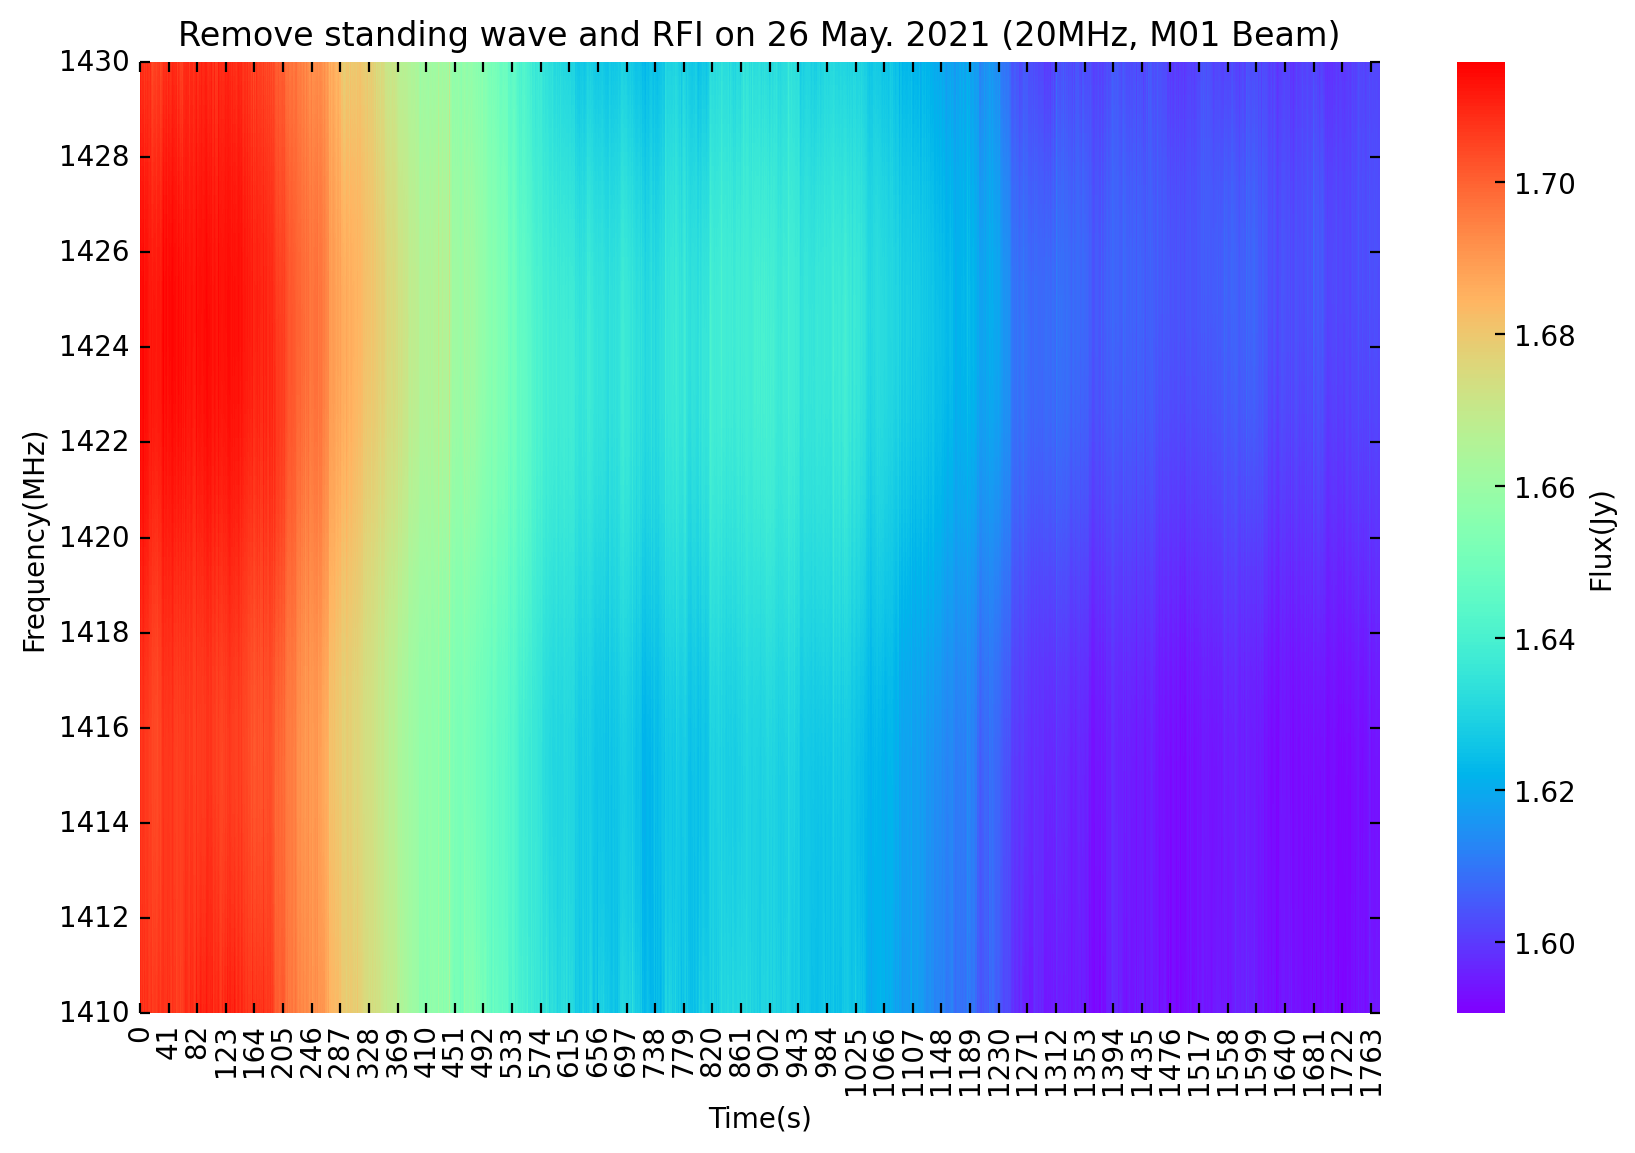

In [22]:
start_frq = 1410

end_frq = 1430

# start = int((start_frq-1050)/400*I__former.shape[0])
# end = int((end_frq-1050)/400*I__former.shape[0])

plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
#cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
cmap = 'rainbow'
# 创建掩码数组
# mask = np.zeros_like(timespec2D_I_F)  # 创建与数据数组相同形状的全零数组
# mask[1500:3000,:] = 1  # 将需要屏蔽的部分设置为 1
# mask[1000:1300,:] = 1  # 将需要屏蔽的部分设置为 1
#sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
sns.heatmap(data = (Ta_total_rm_sd),cmap = cmap,cbar_kws={'label': 'Flux(Jy)'})
#x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator((200)/10)
ax=plt.gca()
ax.invert_yaxis()
ax.set_facecolor("black")
#ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
#ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
# ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
ax.set_yticklabels([i for i in range(start_frq-int((end_frq-start_frq)/10),end_frq+int((end_frq-start_frq)/10),int((end_frq-start_frq)/10))])
#plt.xlabel('time(*10s)')
#plt.ylabel('frequency(*2MHz+1050MHz)')
plt.xlabel('Time(s)')
plt.ylabel('Frequency(MHz)')
plt.title('Remove standing wave and RFI on 26 May. 2021 (20MHz, M01 Beam)')
#plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
#plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
#         png_pth = './png/rm_sd/'
#         if not os.path.exists(pth):
#             os.makedirs(pth)
#         plt.savefig(png_pth+'Antena_Temperature:'+name[11:13]+'.png') # 记得改
#         plt.close()
plt.show()

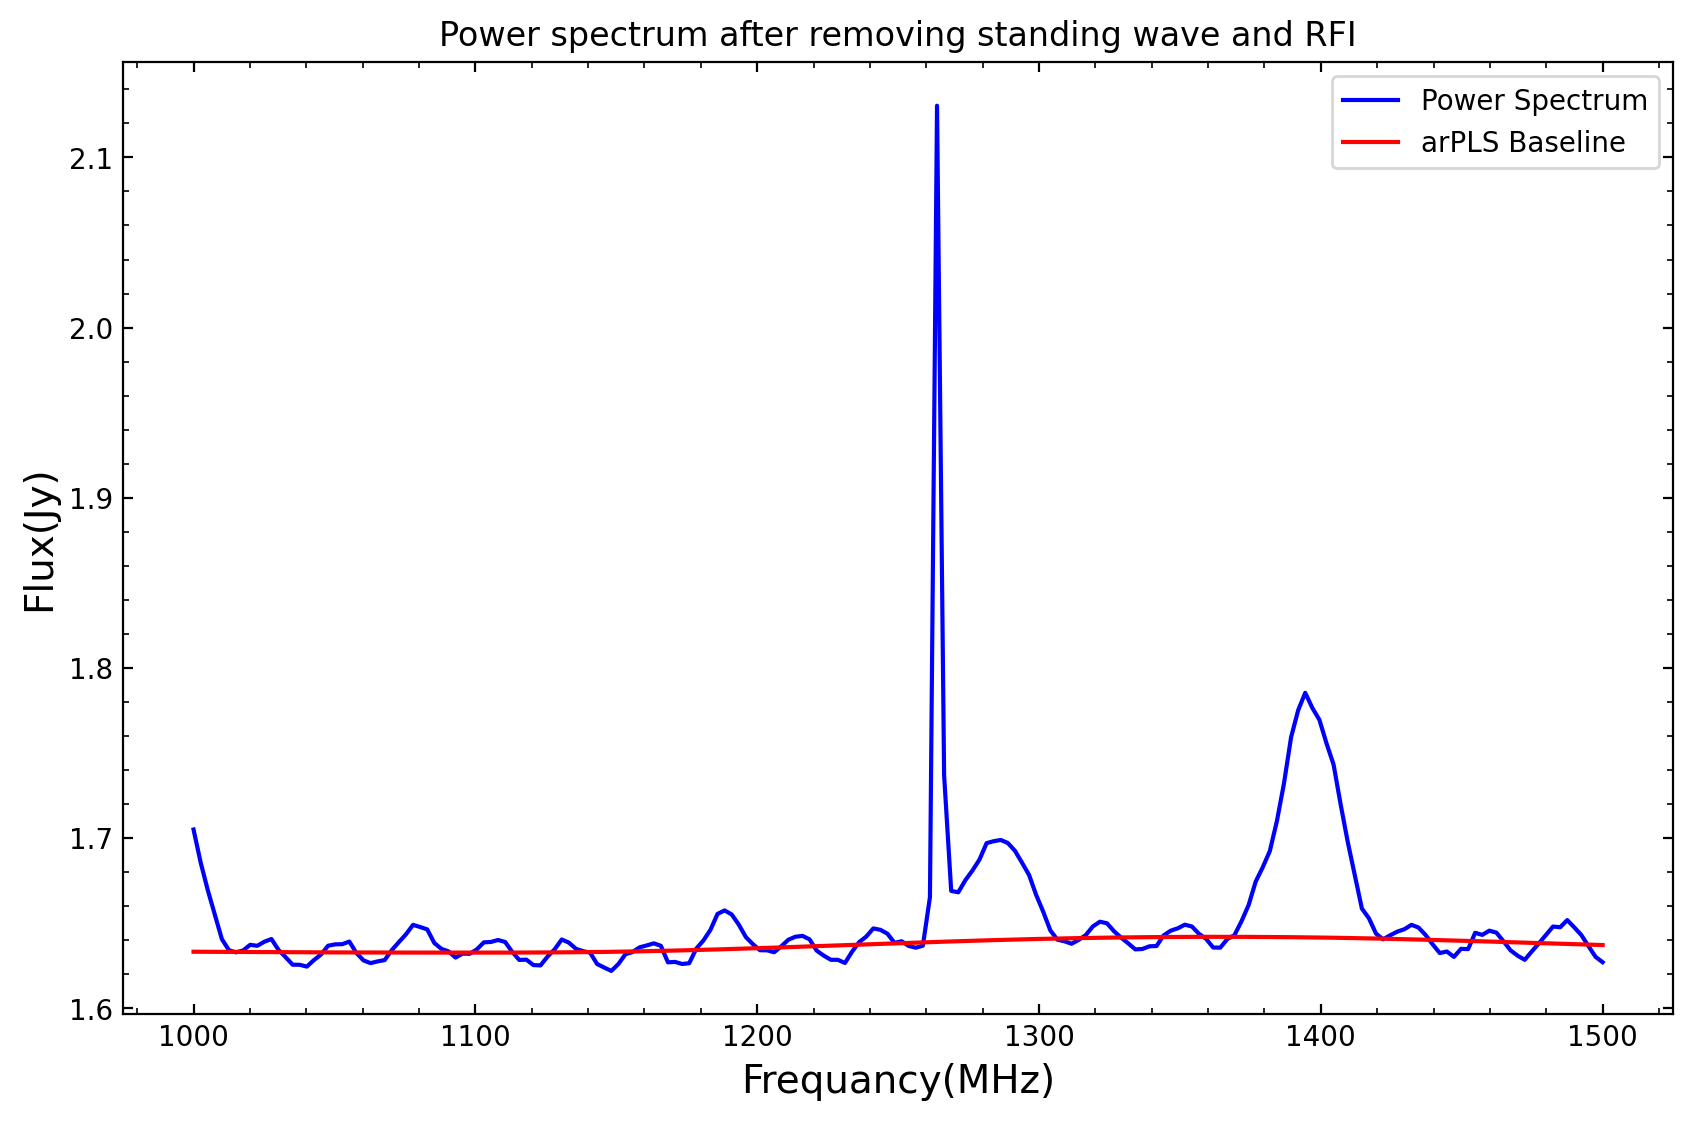

In [27]:
spec_I = np.mean(I_former,axis=1)
frq = np.linspace(1000,1500,len(spec_I))
plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
plt.plot(frq,spec_I,c='blue',label = 'Power Spectrum')
plt.plot(frq,np.mean(Ta_total_rm_sd,axis=1),c='r',label = 'arPLS Baseline')
plt.xlabel('Frequancy(MHz)',fontdict={'size':'14'})
plt.ylabel('Flux(Jy)',fontdict={'size':'14'})
plt.minorticks_on()
# plt.ylim(-1e10,2e11)
plt.legend()
plt.title('Power spectrum after removing standing wave and RFI')
# plt.savefig(png_pth+'Light_curve_20210526_M'+path+'.png') # 记得改
# plt.close()#don't show fig
plt.show()

## light curve and error

In [ ]:
I_Ta = (timespec2D_XX_Ta+timespec2D_YY_Ta)/2

I_F = (timespec2D_XX_Ta+timespec2D_YY_Ta)/2/16.02

I_F_err = ((timespec2D_XX_Ta+timespec2D_YY_Ta)*1.02/((1*400e6/4000)**0.5))/2/16.02-(timespec2D_XX_Ta+timespec2D_YY_Ta)*0.02/2*0.26/16.02**2#dG = 0.26
        

['20210425' '20210426' '20210427' '20210430' '20210501' '20210502'
 '20210503' '20210504' '20210505' '20210506' '20210507' '20210508'
 '20210526']


/tmp/ipykernel_91456/4018625039.py:59: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([700,700],[np.median(lc_I)+0.02,np.median(lc_I)+0.02+err_rd],'go-', color='blue',marker='_', markersize=4,label='random error')
/tmp/ipykernel_91456/4018625039.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot([700,700],[np.median(lc_I)+0.02,np.median(lc_I)+0.02+err_rd],'go-', color='blue',marker='_', markersize=4,label='random error')
/tmp/ipykernel_91456/4018625039.py:60: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot([720,720],[np.median(lc_I)+0.02,np.median(lc_I)+0.02+np.mean(lc_err)],'go-', color='red',marker='_', markersize=4,

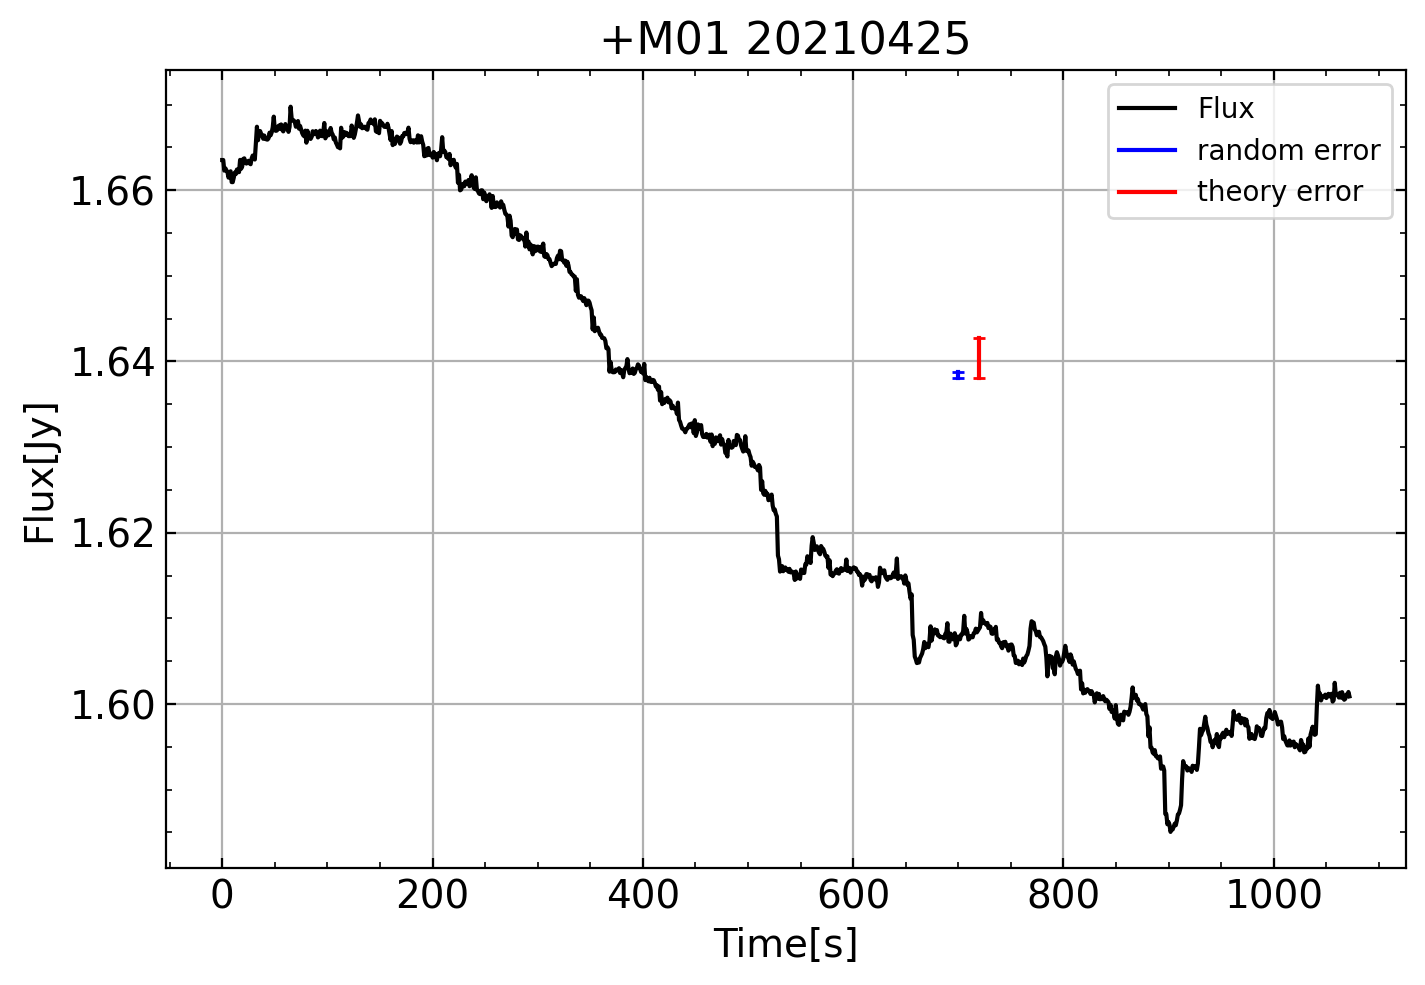

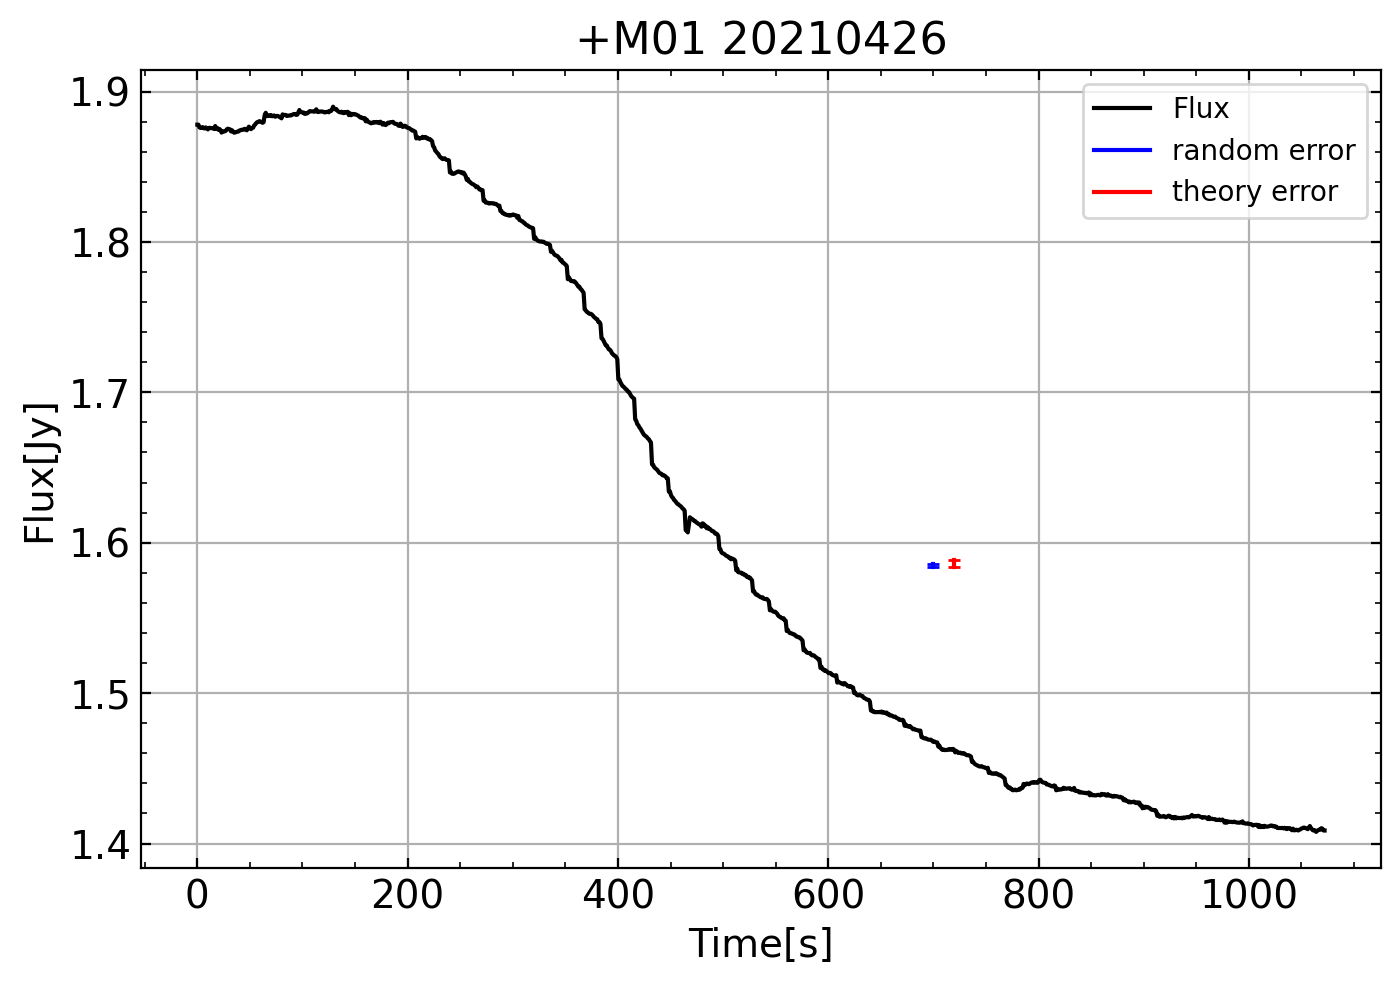

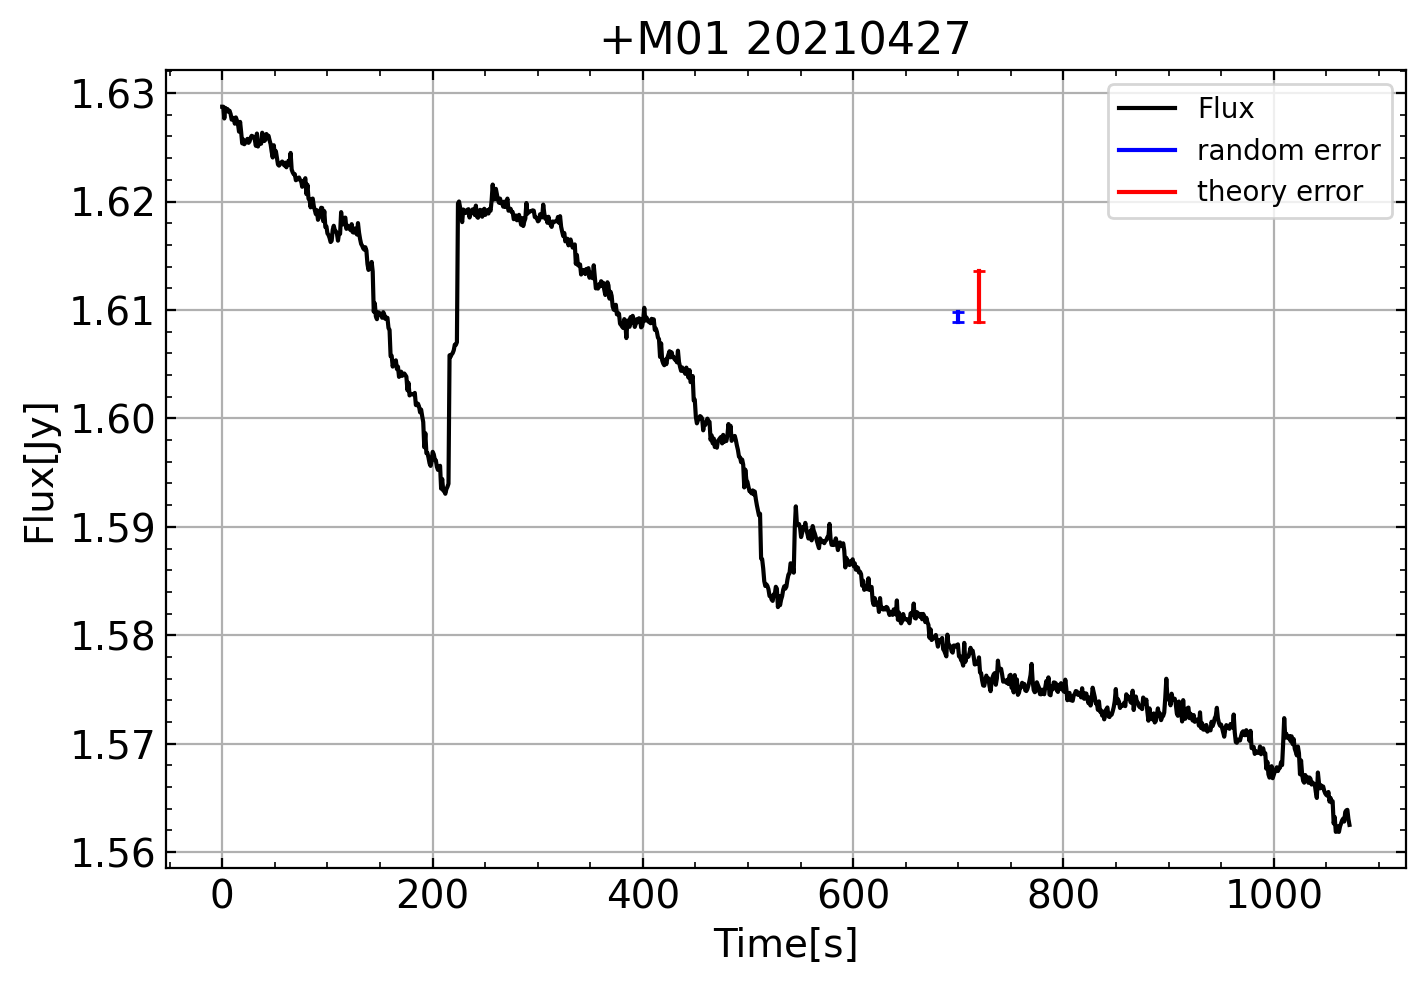

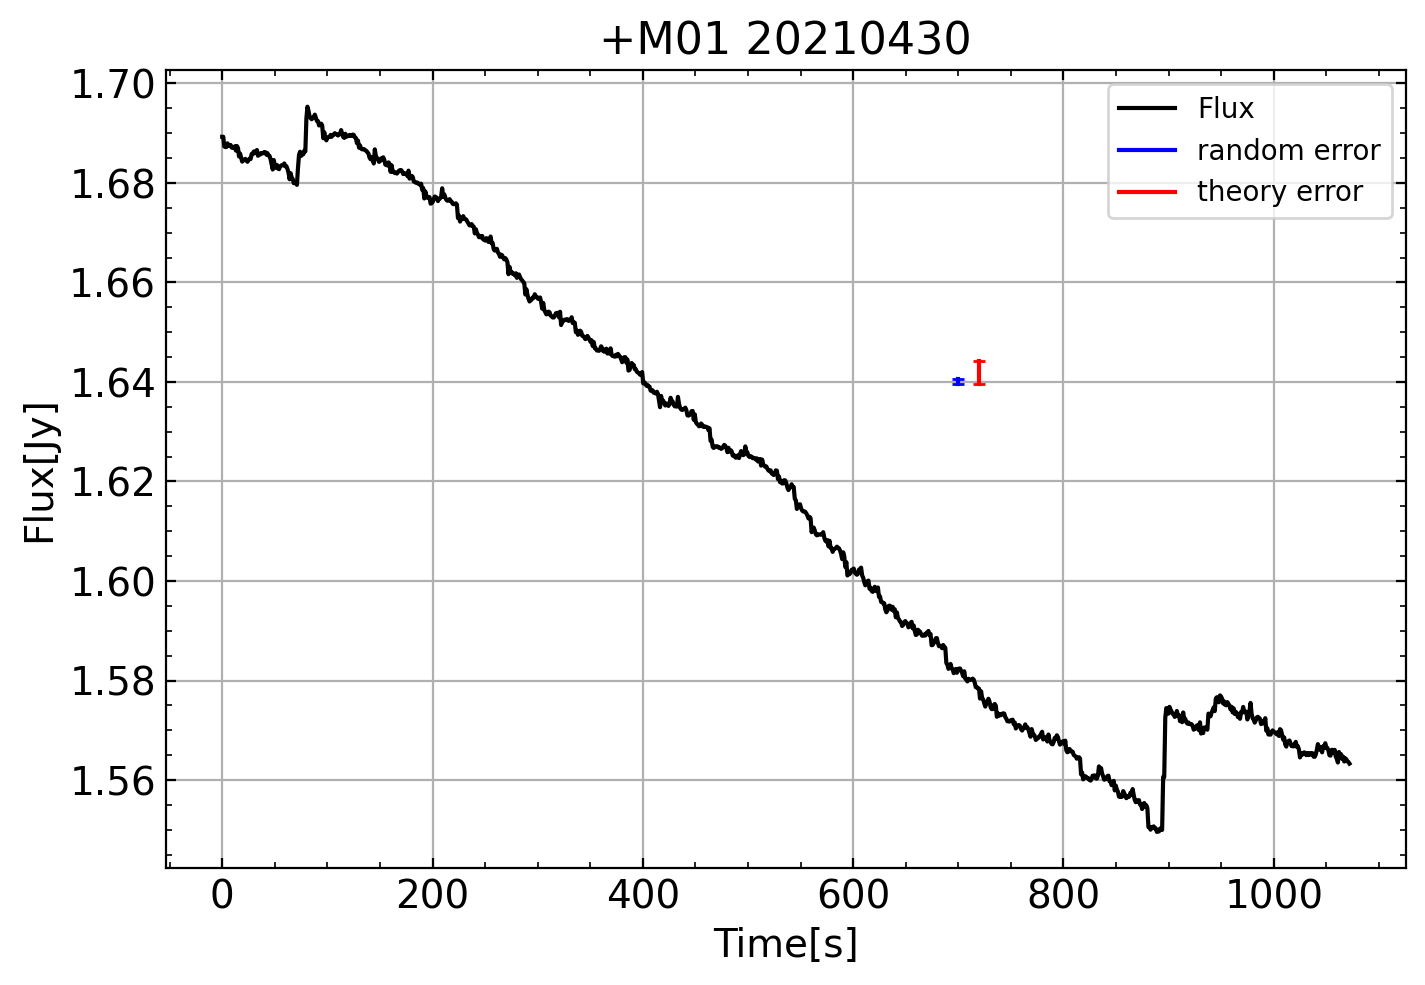

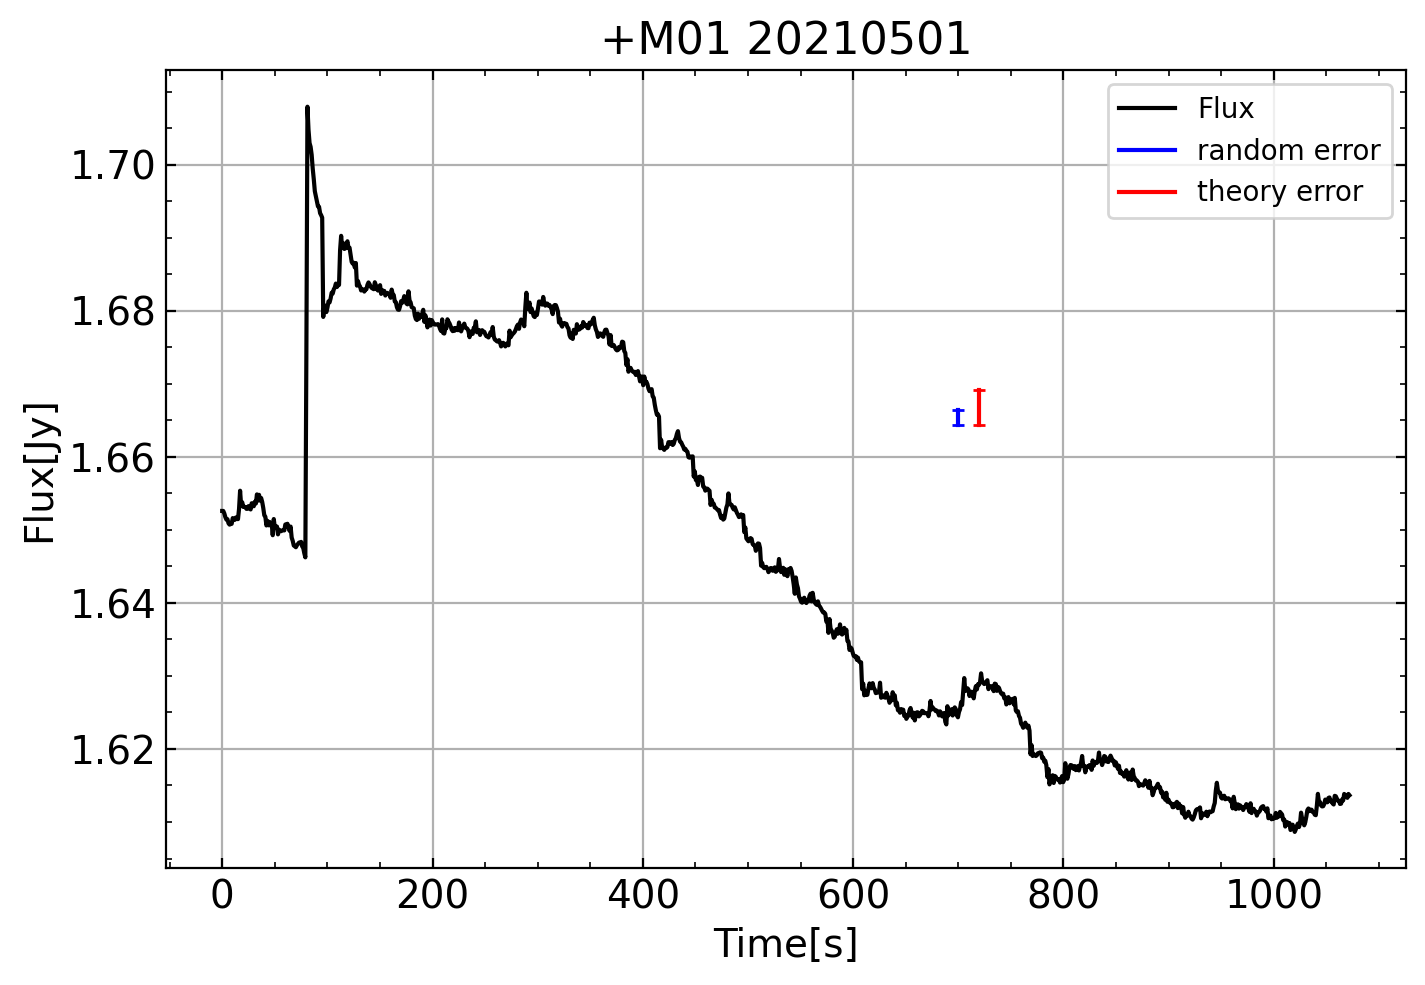

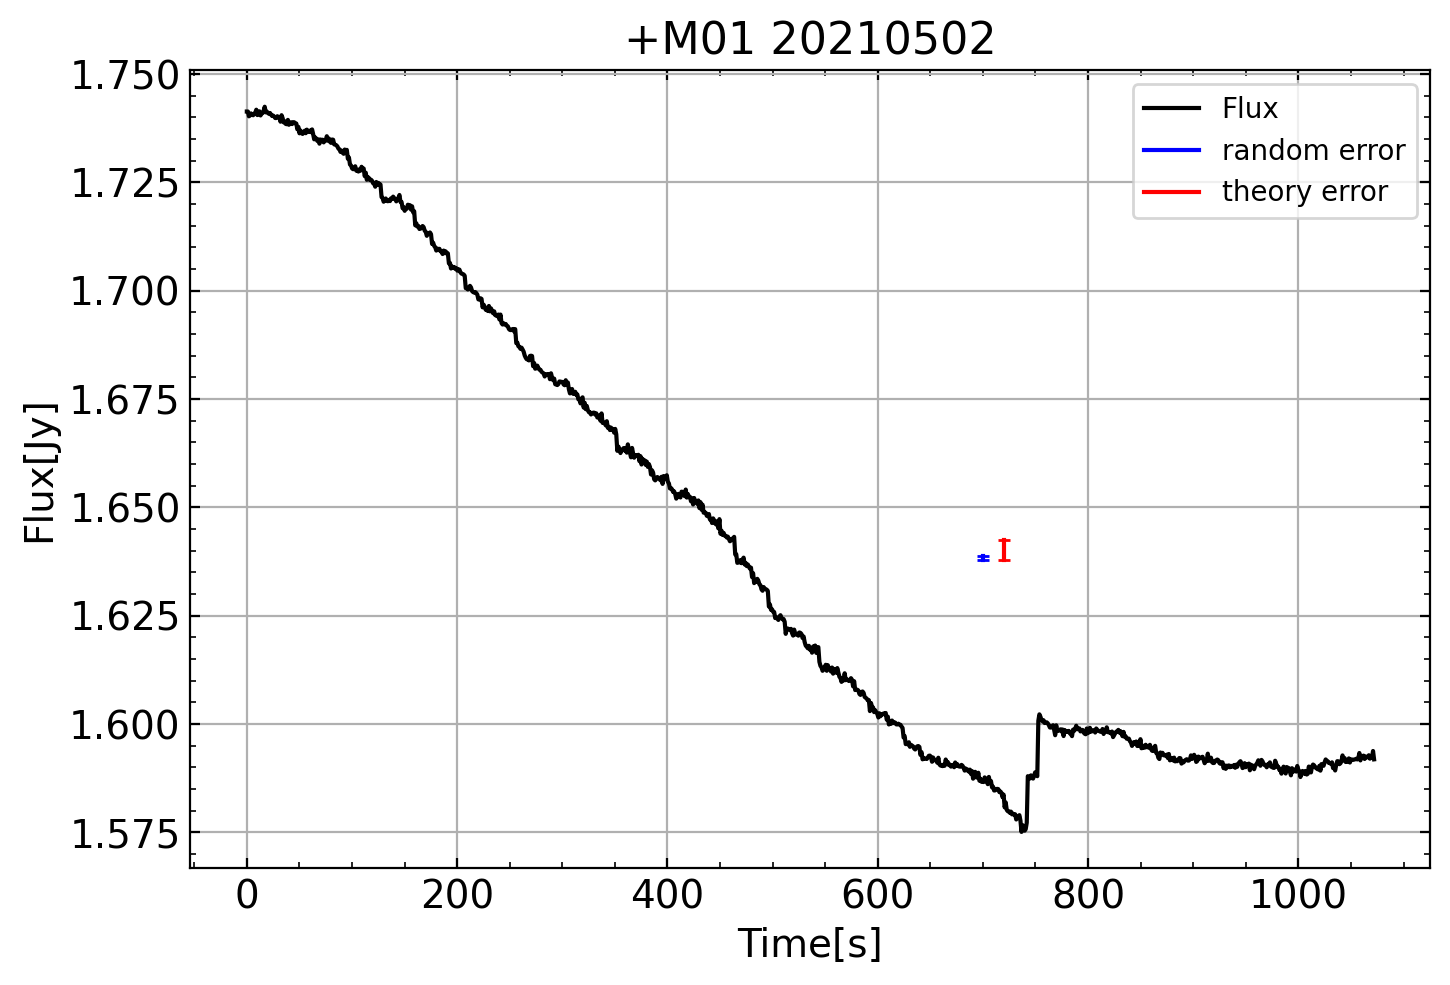

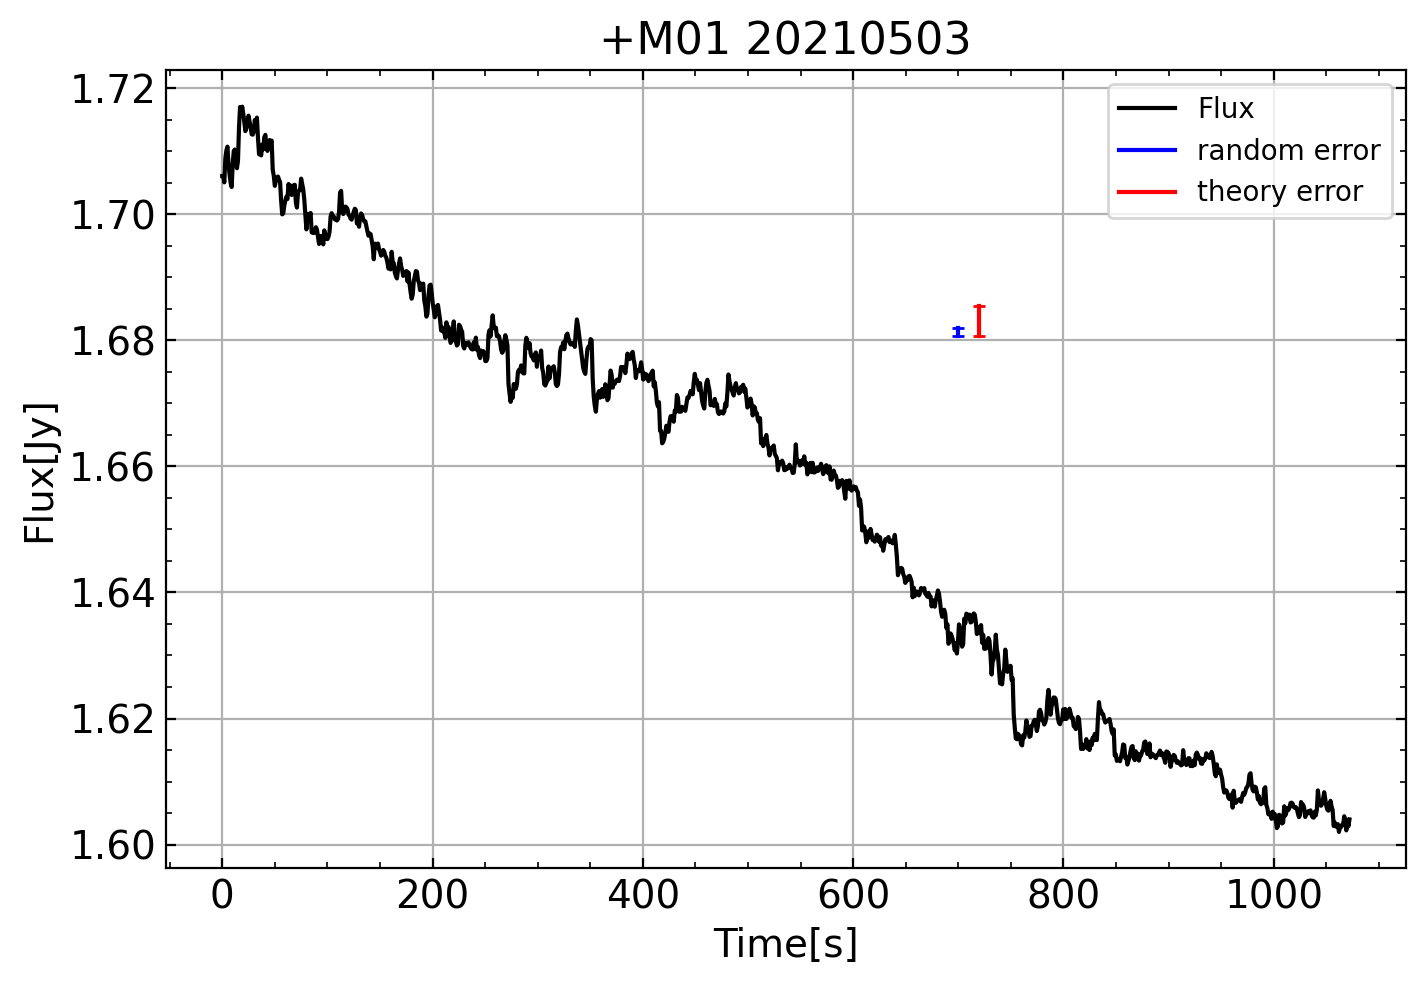

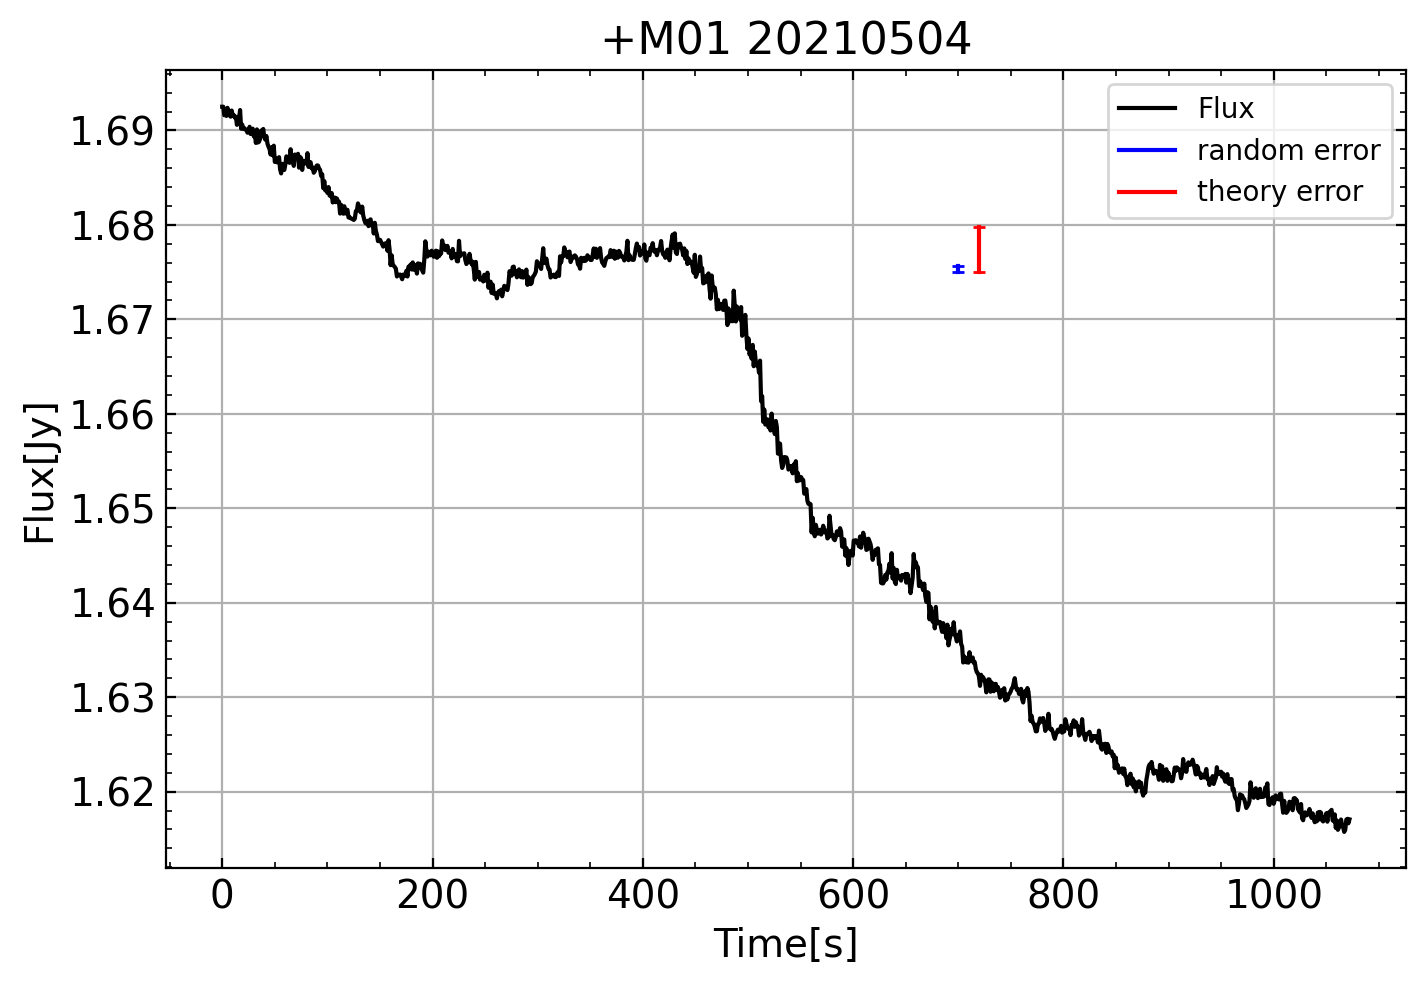

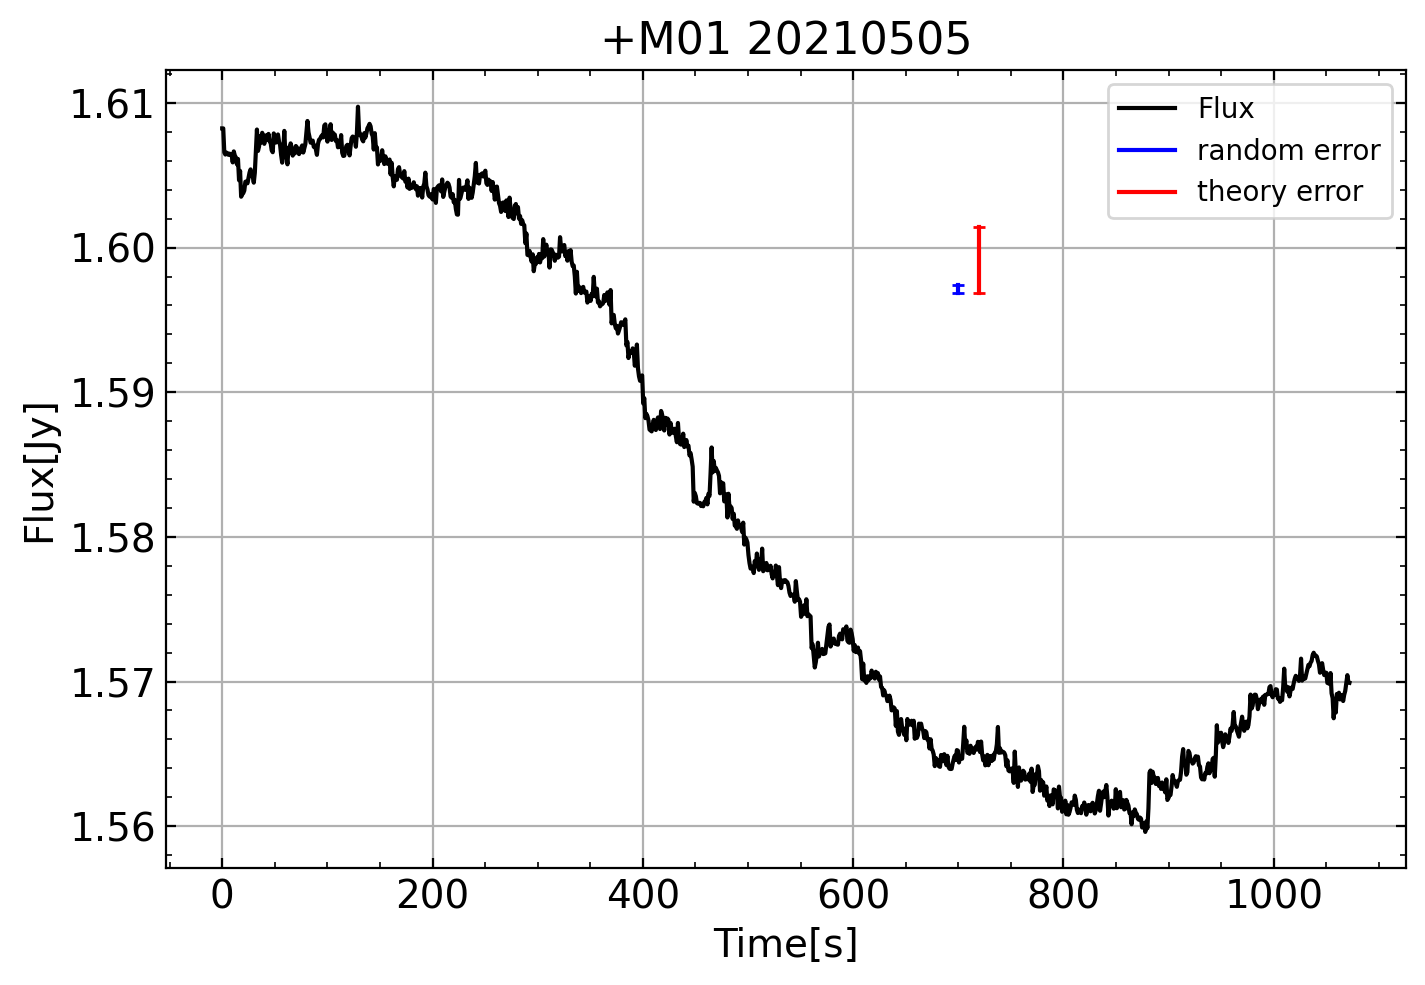

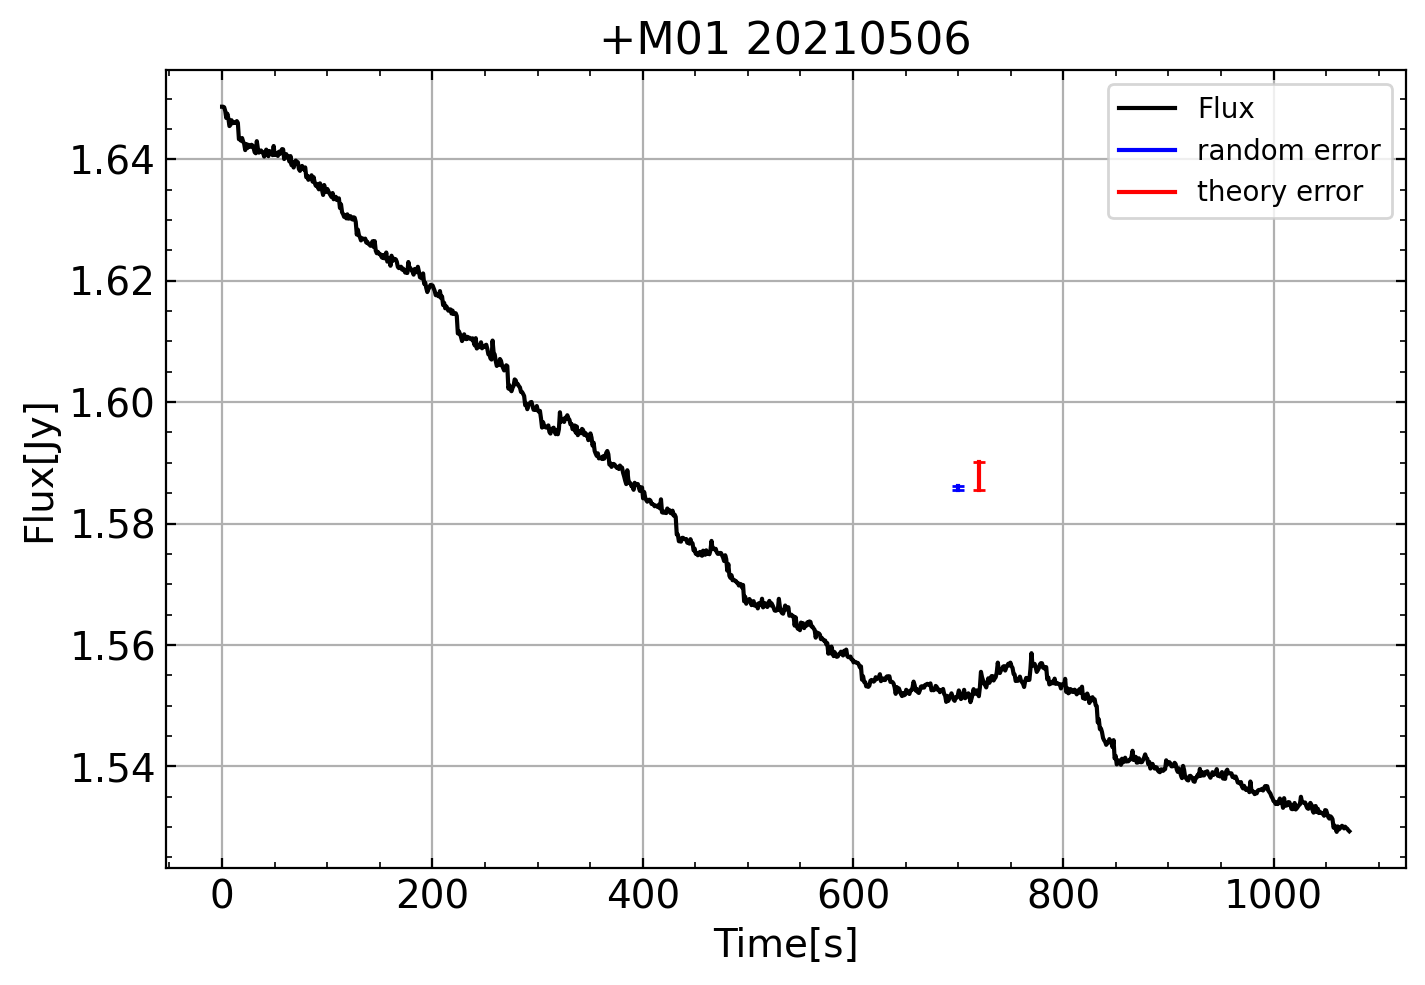

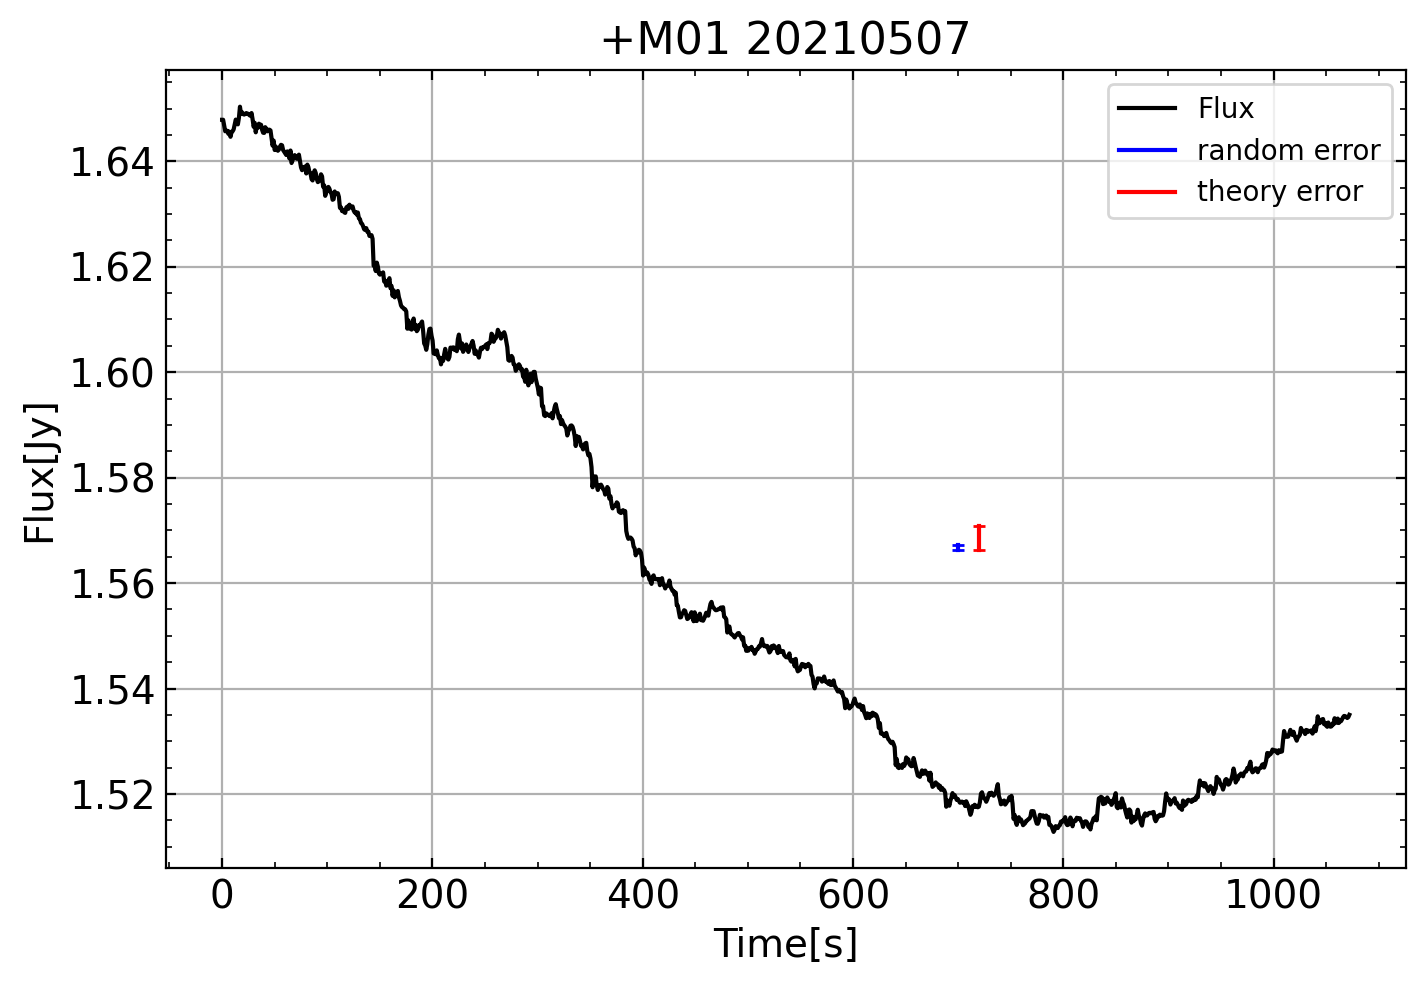

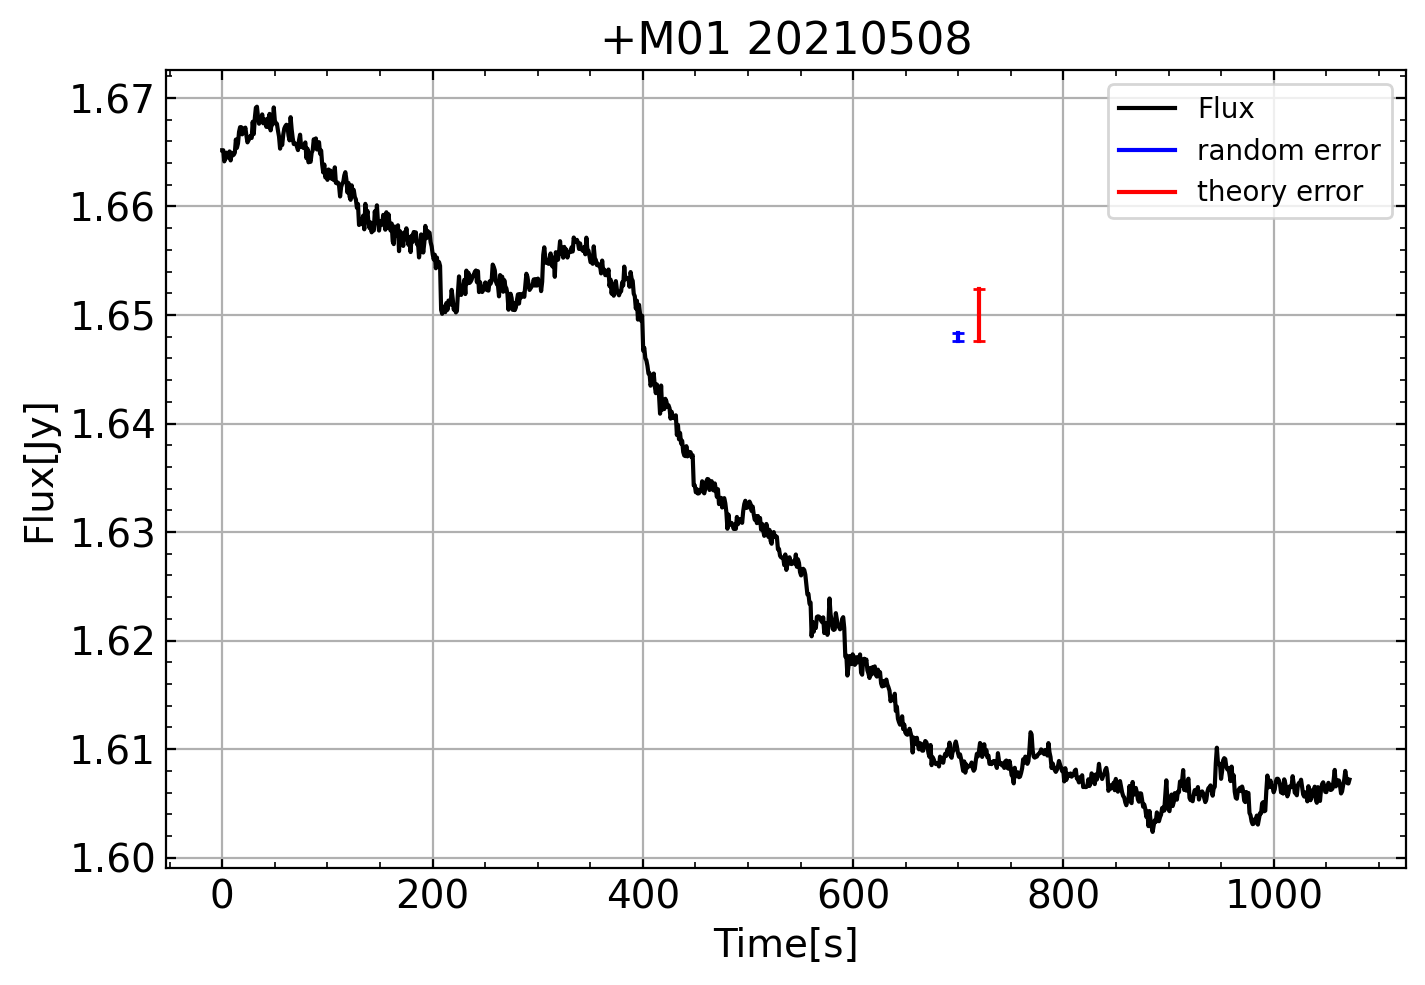

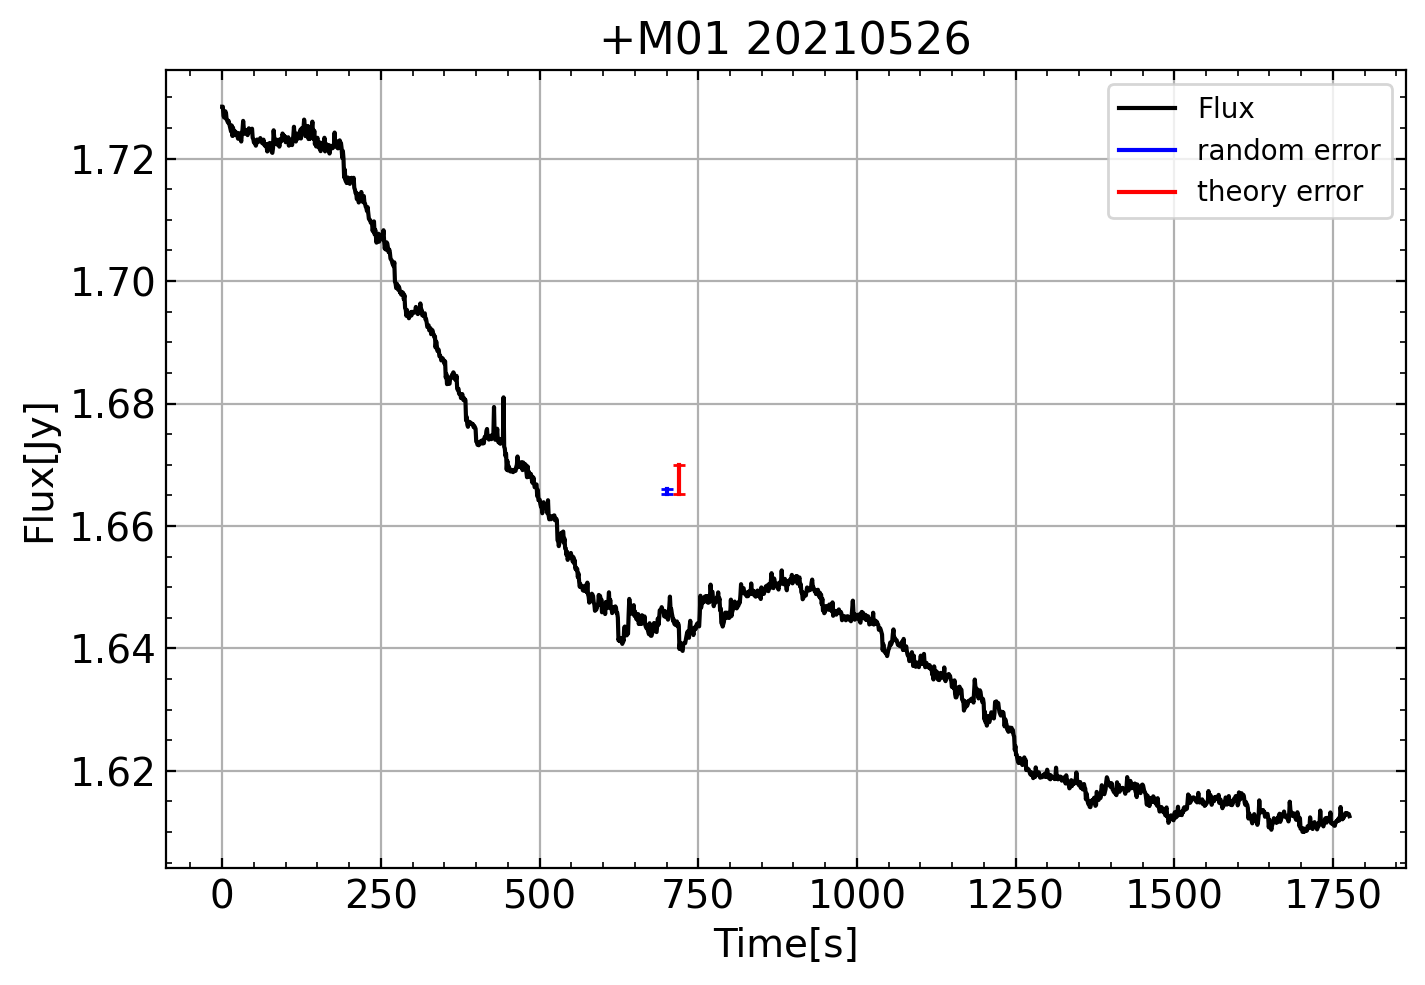

In [41]:
pth = './npy/data/'

# date = []


# for p,path in enumerate(os.listdir (pth)):
#     if p==1:
#         break

# for p in range(len(os.listdir (pth))):
#     if p==1:
#         break
        
        
#     print('\rProcess:'+str(p+1)+'/'+str(len(os.listdir (pth))),end=' ',flush=True)

#     path = '20210426'
# #     print(path)# load in order
#     date.append(path)
# date=sort(date)

# date = [str(date[-1])]#'20210526'

print(DATES)

for i,path in enumerate(DATES):
    
#     print(i)

    for j, name in enumerate(os.listdir (pth+path+'/01/')):
#         print(pth+path+'/')
#         print(name)
        
        if name == 'Ta':
            
            I_F = np.load(pth+path+'/01/'+'/Ta/I_F.npy')
            I_F_err = np.load(pth+path+'/01/'+'/Ta/I_F_err.npy')
            err_rd = np.load(pth+path+'/01/'+'/Ta/err_rd.npy')
            
            if i == 0:
                err_total = np.mean(I_F_err)
            else:
                err_total = np.append(err_total,np.mean(I_F_err))
            
            
            lc_I = np.mean(I_F,axis=0)
            lc_err = np.mean(I_F_err,axis=0)
            
            t = np.linspace(0,len(lc_I),len(lc_I))
            
#             if path == '20210427':
            
            plt.figure(figsize=(8,5.18),dpi=200,facecolor='white')
            plt.plot(t,lc_I,c='k',label = 'Flux')
#             plt.bar(1000,1.62,yerr=np.mean(lc_err), capsize=4,ecolor='k')
#             plt.bar(1000,1.62,yerr=err_rd, capsize=4,ecolor='b')
#             plt.errorbar(1400,1.62,yerr=err_rd, fmt='-o', label='data')
            # plt.errorbar(t[::10],lc_I[::10],yerr=lc_err[::10],fmt='r.',capsize=4,elinewidth=1,ecolor='r')
            plt.plot([700,700],[np.median(lc_I)+0.02,np.median(lc_I)+0.02+err_rd],'go-', color='blue',marker='_', markersize=4,label='random error')
            plt.plot([720,720],[np.median(lc_I)+0.02,np.median(lc_I)+0.02+np.mean(lc_err)],'go-', color='red',marker='_', markersize=4,label='theory error')
            plt.xlabel('Time[s]',fontdict={'size':'14'})
            plt.ylabel('Flux[Jy]',fontdict={'size':'14'})
#             plt.ylim()
            plt.legend(loc=1)
            plt.grid()
            plt.minorticks_on()
            plt.tick_params(labelsize = 14)
            # plt.title('Light_curve_5_26_M01')
            plt.title('+M01 '+path,fontdict={'size':'16'})
#             png_pth = './png/Flux/new/'
#                 if not os.path.exists(png_pth):
#                     os.makedirs(png_pth)    
#             plt.savefig(png_pth+'Flux_'+path+'.png') # 记得改
#             plt.close()
            plt.show()    

In [42]:
err_total.shape

(13,)

In [43]:
np.min(err_total)

0.004528390696912439

# polarization calibration

In [44]:
#find noice injection H band first

for i,day in enumerate(DATES):
    print('\rProcess:'+day,end=' ',flush=True)
    


    pth = './npy/'+day+'/01/1stotal/'
    if not os.path.exists(pth):
        os.makedirs(pth)


    frq_chan = 4000

    #H BW
    start = int((1410-1050)/400*frq_chan)
    end = int((1430-1050)/400*frq_chan)

    for i,name in enumerate(os.listdir (pth)):
    #     if i==1:
    #         break
    # for i in range(len(os.listdir (pth))):
    #     if i==1:
    #         break


        print('\rProcess:'+str(i+1)+'/'+str(len(os.listdir (pth))),end=' ',flush=True)

    #     path = '20210426'



    #     if name == 'timespec2D_YX_M01_total.npy':
        print(name)# load in order

        timespec2D_sum_frq_t_total = np.load(pth+'/'+name)

        print(timespec2D_sum_frq_t_total.shape)



        count = 0

        for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

            m = 16*n + 1

            #for i in range(m,m+15):
            ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete
    #         count = count + 1
        #     print(count)
            if m == 1:
                ref_sum = ref
            else:
                ref_sum = np.column_stack((ref_sum,ref))

        save_pth = './npy/'+day+'/01/noisetub/'
        if not os.path.exists(save_pth):
            os.makedirs(save_pth)



        np.save(save_pth+'noise_'+name[11:13]+'.npy',ref_sum)
    #         ref_mean = ref_sum/count #average of everytime 15
        # print(timespec2D_sum_frq_t_total.shape)        
        # print(ref_mean.shape)
        # Ta_mean = 12.5*(sig - ref)/(2*ref)


Process:1/4 0425 timespec2D_YX_M01_total.npy
(4000, 1073)
Process:2/4 timespec2D_XY_M01_total.npy
(4000, 1073)
Process:3/4 timespec2D_XX_M01_total.npy
(4000, 1073)
Process:4/4 timespec2D_YY_M01_total.npy
(4000, 1073)
Process:1/4 0426 timespec2D_YX_M01_total.npy
(4000, 1073)
Process:2/4 timespec2D_XY_M01_total.npy
(4000, 1073)
Process:3/4 timespec2D_XX_M01_total.npy
(4000, 1073)
Process:4/4 timespec2D_YY_M01_total.npy
(4000, 1073)
Process:1/4 0427 timespec2D_YX_M01_total.npy
(4000, 1073)
Process:2/4 timespec2D_XY_M01_total.npy
(4000, 1073)
Process:3/4 timespec2D_XX_M01_total.npy
(4000, 1073)
Process:4/4 timespec2D_YY_M01_total.npy
(4000, 1073)
Process:1/4 0430 timespec2D_YX_M01_total.npy
(4000, 1073)
Process:2/4 timespec2D_XY_M01_total.npy
(4000, 1073)
Process:3/4 timespec2D_XX_M01_total.npy
(4000, 1073)
Process:4/4 timespec2D_YY_M01_total.npy
(4000, 1073)
Process:1/4 0501 timespec2D_YX_M01_total.npy
(4000, 1073)
Process:2/4 timespec2D_XY_M01_total.npy
(4000, 1073)
Process:3/4 timespec2

In [ ]:
for i,day in enumerate(dates):
#     if i==1:
#         break
    print('\rProcess:'+day,end=' ',flush=True)
    

    pth = './npy/'+day+'/01/noisetub/'

    for i,name in enumerate(os.listdir (pth)):
    #     if i==1:
    #         break
    # for i in range(len(os.listdir (pth))):
    #     if i==1:
    #         break


        print('\rProcess:'+str(i+1)+'/'+str(len(os.listdir (pth))),end=' ',flush=True)

    #     path = '20210426'



        if name == 'noise_XX.npy':

#             print(name)# load in order

            noise_XX = np.load(pth+'/'+name)

#             print(noise_XX.shape)


        elif name == 'noise_YY.npy':

#             print(name)# load in order

            noise_YY = np.load(pth+'/'+name)
# 
#             print(noise_YY.shape)        


        elif name == 'noise_XY.npy':

#             print(name)# load in order

            noise_XY = np.load(pth+'/'+name)

#             print(noise_XY.shape)  


        elif name == 'noise_YX.npy':

#             print(name)# load in order

            noise_YX = np.load(pth+'/'+name)

#             print(noise_YX.shape)  

    # noise_data = np.column_stack((noise_XX,noise_YY,noise_XY,noise_YX))

    # np.save('./npy/'+day+'/01/'+'noise_data.npy',noise_data)
    
    alpha = np.mean(noise_XX,axis=1)/np.mean(noise_YY,axis=1)
    alpha_mean = np.mean(alpha)
    
    print(day,alpha_mean)
    
    delta_noise = np.arctan(np.mean(noise_YX,axis=1)/np.mean(noise_XY,axis=1))



    #Find Ta YX

    pth = './npy/'+day+'/01/'

    Tsys = 20

    frq_chan = 4000

    #H BW
    start = int((1410-1050)/400*frq_chan)
    end = int((1430-1050)/400*frq_chan)
    
#     #Full BW
#     start = 0
#     end = frq_chan

    for i,name in enumerate(os.listdir (pth)):
    #     if i==1:
    #         break
    # for i in range(len(os.listdir (pth))):
    #     if i==1:
    #         break


        print('\rProcess:'+str(i+1)+'/'+str(len(os.listdir (pth))),end=' ',flush=True)

    #     path = '20210426'



        if name == 'timespec2D_YX_M01_total.npy':
            print(name)# load in order

            timespec2D_sum_frq_t_total = np.load(pth+'/'+name)

            print(timespec2D_sum_frq_t_total.shape)



            count = 0

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                #for i in range(m,m+15):
                ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete
    #             count = count + 1
            #     print(count)
                if m == 1:
                    ref_sum = ref
                else:
                    ref_sum = np.column_stack((ref_sum,ref))
            ref_mean_YX = np.mean(ref_sum,axis=1) #average of everytime 15
            # print(timespec2D_sum_frq_t_total.shape)        
            # print(ref_mean.shape)
            # Ta_mean = 12.5*(sig - ref)/(2*ref)


            #Ta

            #cal every 16 ,2 side

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                for i in range(m,m+15):

                    if m == 1:
                        ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete                    
                        sig_ref = timespec2D_sum_frq_t_total[start:end,m-1] - ref#sig except cal at m-1
                    else:
                        sig_ref = (timespec2D_sum_frq_t_total[start:end,m] + timespec2D_sum_frq_t_total[start:end,m-2])/2

    #                 Ta_cal = 12.5*sig_ref/ref_mean #temperature at cal

                    #===================================================
                    #sig = timespec2D_sum_frq_t_total[start:end,i]#i chanel count
                    #use single chanel count
                    #Ta_temp = 12.5*sig/ref_mean #temperature at no cal

                    #===================================================
                    #use two chanels count average
                    sig = timespec2D_sum_frq_t_total[start:end,i]#i chanel count
    #                 Ta_temp = 12.5*((sig-ref)/2)/ref_mean


                    #print(i)
                    if i == 1:
                        timespec2D_sum_frq_t_total_sig = np.column_stack((sig_ref,sig))#Ta_total 
                    elif i != 1 and i == m:
                        timespec2D_sum_frq_t_total_sig = np.column_stack((timespec2D_sum_frq_t_total_sig,sig_ref,sig))
                    else:
                        timespec2D_sum_frq_t_total_sig = np.column_stack((timespec2D_sum_frq_t_total_sig,sig))


            sig_pth = pth+'/'+'sig/'
            if not os.path.exists(sig_pth):
                os.makedirs(sig_pth)

            print('timespec2D_sum_frq_t_total_sig',timespec2D_sum_frq_t_total_sig.shape)

            np.save(sig_pth+name[11:13]+'_sig_1410-1430.npy',timespec2D_sum_frq_t_total_sig)
            

    #Find Ta XY

    pth = './npy/'+day+'/01/'

    Tsys = 20

    frq_chan = 4000

    #H BW
    start = int((1410-1050)/400*frq_chan)
    end = int((1430-1050)/400*frq_chan)

    for i,name in enumerate(os.listdir (pth)):
    #     if i==1:
    #         break
    # for i in range(len(os.listdir (pth))):
    #     if i==1:
    #         break


        print('\rProcess:'+str(i+1)+'/'+str(len(os.listdir (pth))),end=' ',flush=True)

    #     path = '20210426'



        if name == 'timespec2D_XY_M01_total.npy':
            print(name)# load in order

            timespec2D_sum_frq_t_total = np.load(pth+'/'+name)

            print(timespec2D_sum_frq_t_total.shape)



            count = 0

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                #for i in range(m,m+15):
                ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete
    #             count = count + 1
            #     print(count)
                if m == 1:
                    ref_sum = ref
                else:
                    ref_sum = np.column_stack((ref_sum,ref))
            ref_mean_XY = np.mean(ref_sum,axis=1) #average of everytime 15
            # print(timespec2D_sum_frq_t_total.shape)        
            # print(ref_mean.shape)
            # Ta_mean = 12.5*(sig - ref)/(2*ref)


            #Ta

            #cal every 16 ,2 side

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                for i in range(m,m+15):

                    if m == 1:
                        ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete                    
                        sig_ref = timespec2D_sum_frq_t_total[start:end,m-1] - ref#sig except cal at m-1
                    else:
                        sig_ref = (timespec2D_sum_frq_t_total[start:end,m] + timespec2D_sum_frq_t_total[start:end,m-2])/2

    #                 Ta_cal = 12.5*sig_ref/ref_mean #temperature at cal

                    #===================================================
                    #sig = timespec2D_sum_frq_t_total[start:end,i]#i chanel count
                    #use single chanel count
                    #Ta_temp = 12.5*sig/ref_mean #temperature at no cal

                    #===================================================
                    #use two chanels count average
                    sig = timespec2D_sum_frq_t_total[start:end,i]
    #                 Ta_temp = 12.5*((sig-ref)/2)/ref_mean


                    #print(i)
                    if i == 1:
                        timespec2D_sum_frq_t_total_sig = np.column_stack((sig_ref,sig))#Ta_total 
                    elif i != 1 and i == m:
                        timespec2D_sum_frq_t_total_sig = np.column_stack((timespec2D_sum_frq_t_total_sig,sig_ref,sig))
                    else:
                        timespec2D_sum_frq_t_total_sig = np.column_stack((timespec2D_sum_frq_t_total_sig,sig))


            sig_pth = pth+'/'+'sig/'
            if not os.path.exists(sig_pth):
                os.makedirs(sig_pth)

            print('timespec2D_sum_frq_t_total_sig',timespec2D_sum_frq_t_total_sig.shape)

            np.save(sig_pth+name[11:13]+'_sig_1410-1430.npy',timespec2D_sum_frq_t_total_sig)
            



    #load Ta
    timespec2D_XY_sig = np.load(sig_pth+'XY_sig_1410-1430.npy')
    timespec2D_YX_sig = np.load(sig_pth+'YX_sig_1410-1430.npy')


    #Cal delta_star
    delta_rec = np.arctan(timespec2D_YX_sig/timespec2D_XY_sig)
    delta_star = delta_rec.copy()

    for i in range(delta_rec.shape[1]):
        print('\rProcess:'+str(i+1)+'/'+str(delta_rec.shape[1]),end=' ',flush=True)
        delta_star[:,i] = delta_rec[:,i]-delta_noise


    # angel cal 
    timespec2D_XY_sig_cal = timespec2D_XY_sig/np.cos(delta_rec)*np.cos(delta_star)
    timespec2D_YX_sig_cal = timespec2D_YX_sig/np.sin(delta_rec)*np.sin(delta_star)



#     #flux cal

#     ### Calibrate   Important!!! 

#     #Find Ta

    pth = './npy/'+day+'/01/'


    frq_chan = 4000

    #H BW
    start = int((1410-1050)/400*frq_chan)
    end = int((1430-1050)/400*frq_chan)

    for i,name in enumerate(os.listdir (pth)):
    #     if i==1:
    #         break
    # for i in range(len(os.listdir (pth))):
    #     if i==1:
    #         break


#         print('\rProcess:'+str(i+1)+'/'+str(len(os.listdir (pth))),end=' ',flush=True)

    #     path = '20210426'



        if name == 'timespec2D_XX_M01_total.npy':
            print(name)# load in order

            timespec2D_sum_frq_t_total = np.load(pth+'/'+name)

            print(timespec2D_sum_frq_t_total.shape)



            count = 0

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                #for i in range(m,m+15):
                ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete
                count = count + 1
            #     print(count)
                if m == 1:
                    ref_sum = ref
                else:
                    ref_sum = (ref + ref_sum)
                ref_mean = ref_sum/count #average of everytime 15
            # print(timespec2D_sum_frq_t_total.shape)        
            # print(ref_mean.shape)
            # Ta_mean = 12.5*(sig - ref)/(2*ref)


            #Ta

            #cal every 16 ,2 side

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                for i in range(m,m+15):
                    ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete

                    if m == 1:
                        sig_ref = timespec2D_sum_frq_t_total[start:end,m-1] - ref#sig except cal at m-1
                    else:
                        sig_ref = (timespec2D_sum_frq_t_total[start:end,m] + timespec2D_sum_frq_t_total[start:end,m-2])/2

                    coef_X = np.sqrt(12.5/ref_mean)

                    #===================================================
                    #sig = timespec2D_sum_frq_t_total[start:end,i]#i chanel count
                    #use single chanel count
                    #Ta_temp = 12.5*sig/ref_mean #temperature at no cal

                    #===================================================
                    #use two chanels count average

        elif name == 'timespec2D_YY_M01_total.npy':

            print(name)# load in order

            timespec2D_sum_frq_t_total = np.load(pth+'/'+name)

            print(timespec2D_sum_frq_t_total.shape)



            count = 0

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                #for i in range(m,m+15):
                ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete
                count = count + 1
            #     print(count)
                if m == 1:
                    ref_sum = ref
                else:
                    ref_sum = (ref + ref_sum)
                ref_mean = ref_sum/count #average of everytime 15
            # print(timespec2D_sum_frq_t_total.shape)        
            # print(ref_mean.shape)
            # Ta_mean = 12.5*(sig - ref)/(2*ref)


            #Ta

            #cal every 16 ,2 side

            for n in range(len(timespec2D_sum_frq_t_total[0,:])//16):

                m = 16*n + 1

                for i in range(m,m+15):
                    ref = timespec2D_sum_frq_t_total[start:end,m-1]-timespec2D_sum_frq_t_total[start:end,m]#discrete

                    if m == 1:
                        sig_ref = timespec2D_sum_frq_t_total[start:end,m-1] - ref#sig except cal at m-1
                    else:
                        sig_ref = (timespec2D_sum_frq_t_total[start:end,m] + timespec2D_sum_frq_t_total[start:end,m-2])/2

                    coef_Y = np.sqrt(12.5/ref_mean) 


    YX_flux = timespec2D_YX_sig_cal.copy()
    for i in range(timespec2D_YX_sig_cal.shape[1]):
        print('\rProcess:'+str(i+1)+'/'+str(timespec2D_YX_sig_cal.shape[1]),end=' ',flush=True)
        YX_flux[:,i] = timespec2D_YX_sig_cal[:,i]*coef_X*coef_Y*np.sqrt(alpha)
        


    #plot for checking
    plt.figure(figsize=(20,10),dpi = 200,facecolor='white')
    #cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
    cmap = 'rainbow'
    #sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
    sns.heatmap(data = (YX_flux),cmap = cmap,cbar_kws={'label': 'flux(Jy)'})
    #x_major_locator=MultipleLocator(30)
    y_major_locator=MultipleLocator(20)
    ax=plt.gca()
    #ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    #ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
    ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
    #plt.xlabel('time(*10s)')
    #plt.ylabel('frequency(*2MHz+1050MHz)')
    plt.xlabel('time(s)')
    plt.ylabel('frequency(MHz)')
    plt.title('YX_flux_'+day)
    #plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
    #plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
    png_pth = './png/stokesV/'
    if not os.path.exists(png_pth):
        os.makedirs(png_pth)
    plt.savefig(png_pth+'YX_flux_'+day+'.png') # 记得改
    plt.close()
#     plt.show()


    frq = np.linspace(1410,1430,len(YX_flux[:,0]))
    plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
    plt.plot(frq,np.mean(YX_flux,axis=1),label = 'Power spectrum')
    plt.xlabel('Freqency(MHz)')
    plt.ylabel('Flux(Jy)')
    plt.legend()
    plt.title('Power_spectrum_StokesV_flux'+day)
    #plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
    #plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
    # plt.savefig(png_pth+'Power_spectrum_'+path+'.png') # 记得改
    plt.savefig(png_pth+'Power_spectrum_StokesV_flux_'+day+'.png') # 记得改
    plt.close()
#     plt.show()




    #remove standing wave
    
            #sigma remove 
    
    
    for j in range(len(YX_flux[0,:])):
#         print('\rProcess:'+str(t)+'/'+str(len(YX_flux[0,:])),end=' ',flush=True)


        arr = YX_flux[:,j]

        threshold = 1.5*np.std(arr)
        constant_value = threshold

        # 创建一个布尔索引数组，表示哪些元素大于阈值
        mask = arr > threshold

        # 使用布尔索引将大于阈值的元素设置为常数值
        arr[mask] = constant_value

        # 创建一个布尔索引数组，表示哪些元素大于阈值
        mask1 = arr < -threshold

        # 使用布尔索引将大于阈值的元素设置为常数值
        arr[mask1] = -constant_value



    t = np.linspace(0,len(YX_flux[0,:]),len(YX_flux[0,:]))
    frq = np.linspace(1410,1430,len(YX_flux[:,0]))
    


    print(day)
    


    for i in range(len(t)):
        

        print('\rProcess:'+str(i+1)+'/'+str(len(t)),end=' ',flush=True)


        y = YX_flux[:,i]

        #==============================find the baseline======================== 

        baseline_fitter = Baseline(frq, check_finite=False)#creat x axis


        #model y
        bkg_1 = baseline_fitter.modpoly(y, poly_order=3)[0]
    #     print(str(bkg_1.shape),end=' ',flush=True)

        bkg_2 = baseline_fitter.asls(y, lam=1e7, p=0.02)[0]
        bkg_3 = baseline_fitter.mor(y, half_window=30)[0]
        bkg_4 = baseline_fitter.snip(
            y, max_half_window=40, decreasing=True, smooth_half_window=3
        )[0]
    #         bkg_5 = baseline_fitter.arpls(data, lam=100000.0, diff_order=2, max_iter=50, tol=0.001, weights=None, x_data=None)
        bkg_5 = baseline_fitter.arpls(y, lam=100000.0, diff_order=2, max_iter=50, tol=1e-5, weights=None)[0]



        #==============================combine in every time bin========================  

        if i == 0:
            V_rm_sd = bkg_5
        else:
            V_rm_sd=np.column_stack((V_rm_sd,bkg_5))

    #     print(str(Ta_total_rm_sd.shape))

    # print(Ta_total_sum_t_rm_sd_sm_total) 
    # np.save('Ta_total_sum_t_rm_sd_sm_total.npy',Ta_total_sum_t_rm_sd_sm_total)



    #     print(YX_flux.shape)


    plt.figure(figsize=(20,10),dpi = 200,facecolor='white')
    #cmap = sns.cubehelix_palette(reverse = True,as_cmap=True)
    cmap = 'rainbow'
    #sns.heatmap(data = np.log(timespec2D_sum),cmap=sns.cubehelix_palette(as_cmap=True))
    sns.heatmap(data = (V_rm_sd),cmap = cmap,cbar_kws={'label': 'flux(Jy)'})
    # x_major_locator=MultipleLocator(100)
    y_major_locator=MultipleLocator(20)
    ax=plt.gca()
    # ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    #ax.set_xticklabels(['0','0','300','600','900','1200','1500','1800','2100','2400','2700'])
    ax.set_yticklabels(['1410','1410','1412','1414','1416','1418','1420','1422','1424','1426','1428','1430'])
    #plt.xlabel('time(*10s)')
    #plt.ylabel('frequency(*2MHz+1050MHz)')
    plt.xlabel('time(s)')
    plt.ylabel('frequency(MHz)')
    plt.title('StokesV_flux_remove_standingwave_'+day)
    #plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
    #plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
    #         png_pth = './png/rm_sd/'
    #         if not os.path.exists(pth):
    #             os.makedirs(pth)
    plt.savefig(png_pth+'StokesV_flux_remove_standingwave_'+day+'.png') # 记得改
    plt.close()
#     plt.show()
    
    plt.figure(figsize=(10,6.18),dpi = 200,facecolor='white')
    plt.plot(frq,np.mean(YX_flux,axis=1),label = 'power spectrum')
    plt.plot(frq,np.mean(V_rm_sd,axis=1),label = 'baseline')
    plt.xlabel('frequancy(MHz)',fontsize='large', fontweight='bold')
    plt.ylabel('Flux(Jy)',fontsize='large', fontweight='bold')
    plt.legend()
    plt.title('spectrum_remove_standingwave_'+day)
    #plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
    #plt.title('Neptune_cut'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+128)+'s') # 记得改
    plt.savefig(png_pth+'spectrum_remove_standingwave_'+day+'.png') # 记得改
    plt.close()
#     plt.show()


    plt.figure(figsize=(12,6),dpi = 200,facecolor='white')
    plt.plot(t,np.mean(V_rm_sd,axis=0),label = 'Light curve')
    plt.xlabel('t(s)')
    plt.ylabel('Flux(Jy)')
    plt.legend()
    plt.title('StokesV_'+day)
    #plt.title('Neptune_Temperture'+str(n+1)+':'+str(128*n)+'s-'+str(128*n+49.8)+'s')
    plt.savefig(png_pth+'StokesV_'+day+'.png') # 记得改
    plt.close()
#     plt.show()#don't show fig